In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import random

import torchvision.transforms as transforms
from google.colab import files
import zipfile
import os


uploaded = files.upload()

Saving dl-2025-competition-1.zip to dl-2025-competition-1.zip


In [2]:
# –†–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞–µ–º –∞—Ä—Ö–∏–≤
with zipfile.ZipFile("dl-2025-competition-1.zip", 'r') as zip_ref:
    zip_ref.extractall("data")  # —Ä–∞—Å–ø–∞–∫–æ–≤–∞–ª–∏ –≤ –ø–∞–ø–∫—É "data"

print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –∞—Ä—Ö–∏–≤–∞:", os.listdir("data"))
print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏ –¥–∞—Ç–∞:", os.listdir("data/data"))
print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏ train:", os.listdir("data/data/train"))
print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏ test:", os.listdir("data/data/test"))

–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –∞—Ä—Ö–∏–≤–∞: ['sample_submission.csv', 'data']
–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏ –¥–∞—Ç–∞: ['train', 'test']
–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏ train: ['81', '83', '58', '57', '55', '44', '6', '45', '22', '37', '24', '77', '71', '5', '88', '68', '95', '78', '67', '10', '31', '94', '59', '42', '7', '35', '56', '99', '76', '84', '17', '28', '74', '73', '46', '3', '92', '18', '0', '34', '38', '96', '69', '75', '21', '8', '98', '36', '62', '20', '82', '39', '72', '41', '60', '80', '12', '19', '30', '26', '54', '40', '90', '65', '64', '32', '70', '9', '25', '16', '79', '97', '14', '33', '51', '52', '49', '47', '48', '11', '43', '91', '2', '50', '13', '86', '85', '4', '53', '87', '89', '29', '27', '61', '1', '66', '93', '63', '23', '15']
–°–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–∞–ø–∫–∏ test: ['3410.png', '2647.png', '2468.png', '2470.png', '733.png', '3832.png', '2225.png', '3247.png', '3391.png', '492.png', '3757.png', '1966.png', '2123.png', '3538.png', '226.png', '1198.png', '3817.png', '

# –ë–ª–æ–∫ 1. –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 100
–ù–∞–∏–±–æ–ª—å—à–µ–µ –∏ –Ω–∞–∏–º–µ–Ω—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –≤ –∫–ª–∞—Å—Å–µ:
–ö–ª–∞—Å—Å 85: 150 –∫–∞—Ä—Ç–∏–Ω–æ–∫
–ö–ª–∞—Å—Å 23: 32 –∫–∞—Ä—Ç–∏–Ω–æ–∫


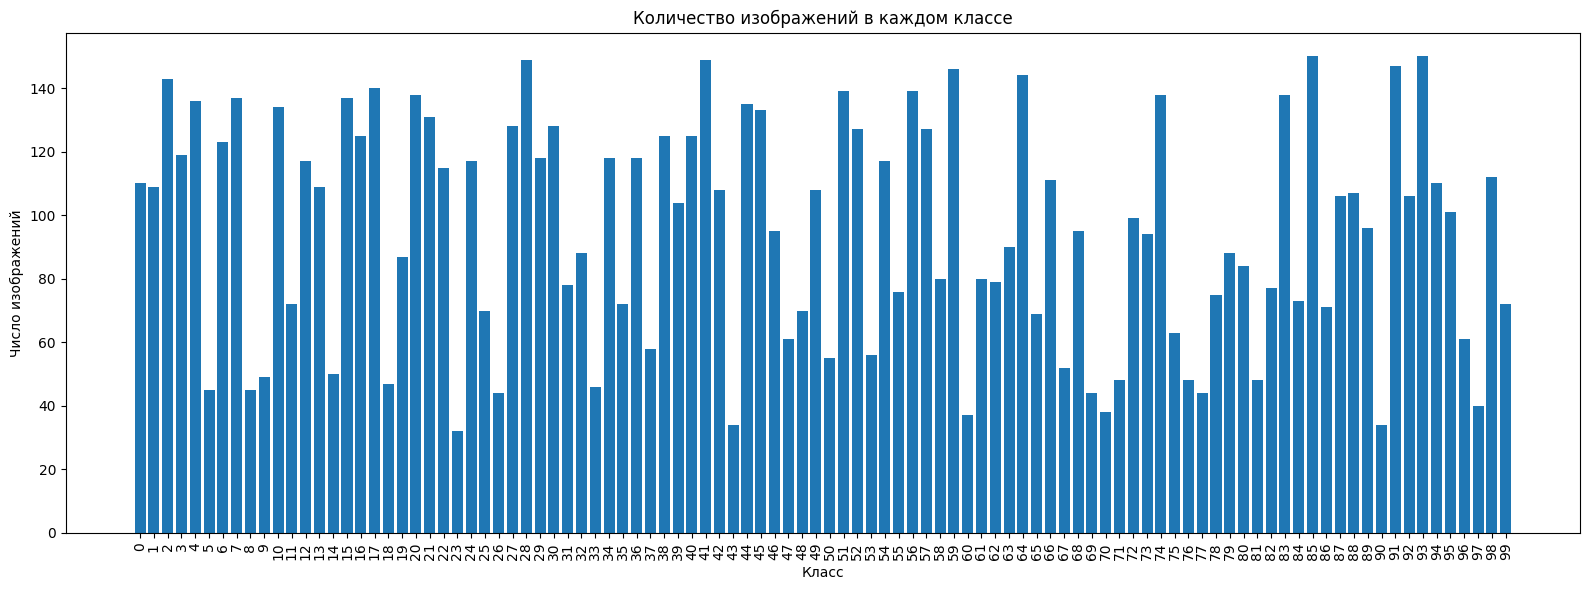

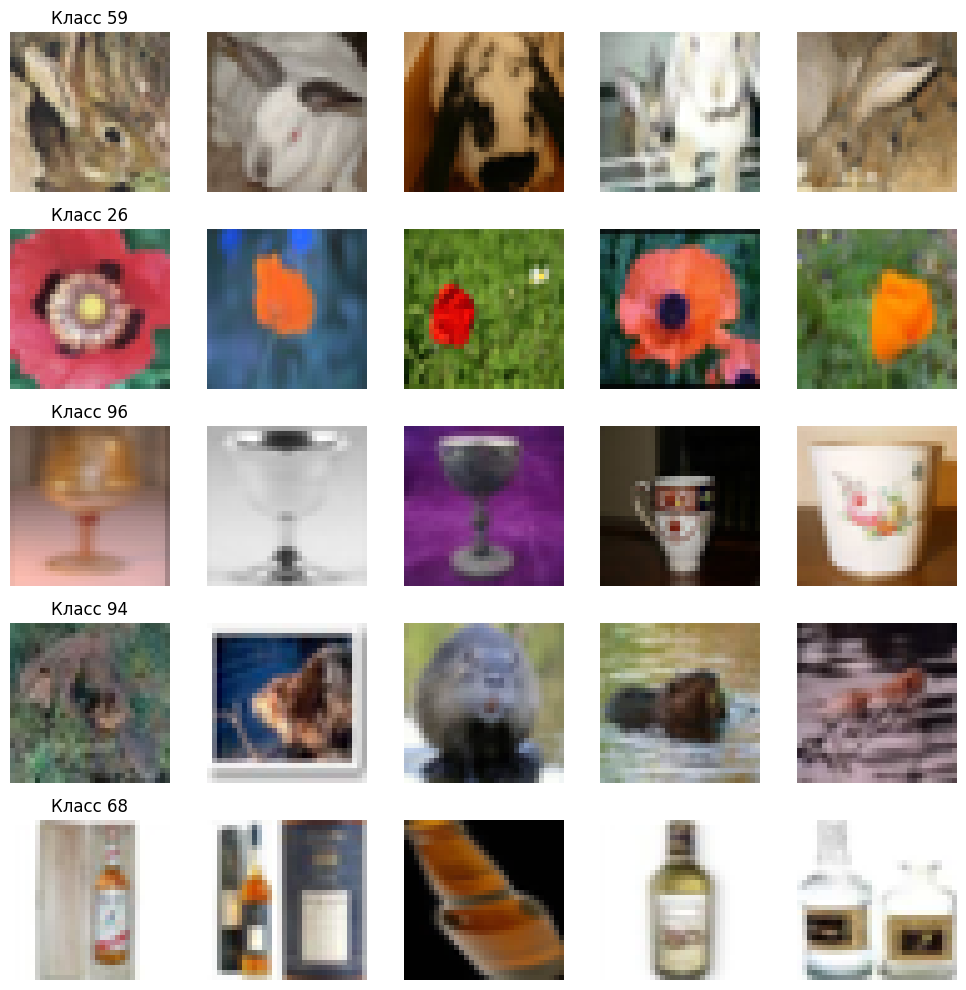

In [3]:
train_dir = 'data/data/train'

# –°–ø–∏—Å–æ–∫ –∫–ª–∞—Å—Å–æ–≤
class_names = sorted(os.listdir(train_dir))
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {len(class_names)}')

# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ
class_counts = {}
for cls in class_names:
    cls_path = os.path.join(train_dir, cls)
    image_files = os.listdir(cls_path)
    class_counts[cls] = len(image_files)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –∫–ª–∞—Å—Å–æ–≤ –ø–æ —á–∏—Å–ª—É –∫–∞—Ä—Ç–∏–Ω–æ–∫ (–µ—Å–ª–∏ –≤–¥—Ä—É–≥ –∏—Ö –º–Ω–æ–≥–æ)
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
print("–ù–∞–∏–±–æ–ª—å—à–µ–µ –∏ –Ω–∞–∏–º–µ–Ω—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –≤ –∫–ª–∞—Å—Å–µ:")
for cls, count in sorted_counts[:1]:
    print(f'–ö–ª–∞—Å—Å {cls}: {count} –∫–∞—Ä—Ç–∏–Ω–æ–∫')
for cls, count in sorted_counts[99:]:
    print(f'–ö–ª–∞—Å—Å {cls}: {count} –∫–∞—Ä—Ç–∏–Ω–æ–∫')



sorted_class_counts = dict(sorted(class_counts.items(), key=lambda x: int(x[0])))

# üìä –†–∏—Å—É–µ–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É
plt.figure(figsize=(16, 6))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xticks(rotation=90)
plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ")
plt.xlabel("–ö–ª–∞—Å—Å")
plt.ylabel("–ß–∏—Å–ª–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
plt.tight_layout()
plt.show()

# üñºÔ∏è –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–º–µ—Ä–æ–≤ –ø–æ 5 —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
num_classes_to_show = 5
num_images_per_class = 5
sampled_classes = random.sample(class_names, num_classes_to_show)

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

fig, axes = plt.subplots(num_classes_to_show, num_images_per_class, figsize=(10, 2 * num_classes_to_show))

for i, cls in enumerate(sampled_classes):
    img_files = os.listdir(os.path.join(train_dir, cls))
    sampled_imgs = random.sample(img_files, num_images_per_class)

    for j, img_name in enumerate(sampled_imgs):
        img_path = os.path.join(train_dir, cls, img_name)
        img = Image.open(img_path).convert("RGB")
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(f'–ö–ª–∞—Å—Å {cls}', fontsize=12)

plt.tight_layout()
plt.show()

–∏–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –∫–ª–∞—Å—Å—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ. –Ω–∞–∏–º–µ–Ω—å—à–µ–µ –∏ –Ω–∞–∏–±–æ–ª—å—à–µ–µ —á–∏—Å–ª–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–ª–∞—Å—Å–∞—Ö - 32 –∏ 150, —Ä–∞–∑–ª–∏—á–∏–µ –ø–æ—á—Ç–∏ –≤ 5 —Ä–∞–∑

–∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Å - –æ–¥–Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏—è –∫–∞—Ä—Ç–∏–Ω–æ–∫, –≤—Å–µ–≥–æ 100 –∫–ª–∞—Å—Å–æ–≤

–ø—Ä–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –≤—ã—è–≤–∏–ª–∞, —á—Ç–æ –∏–Ω–æ–≥–¥–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –æ—Ç–ª–∏—á–∞—é—â–∏–µ—Å—è –∫–∞—Ä—Ç–∏–Ω–∫–∏ (–≤ 8 –∫–ª–∞—Å—Å–µ –Ω–∞—Ä—è–¥—É —Å –ª–∏—Ü–∞–º–∏ –¥–µ–≤—É—à–µ–∫ –µ—Å—Ç—å –Ω–µ–ø–æ–¥—Ö–æ–¥—è—â–∏–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ —Å —Ç–µ–ª–∞–º–∏ –ª—é–¥–µ–π, –æ–Ω–∏ –Ω–µ —Å–æ–≤—Å–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∫–ª–∞—Å—Å—É)

–∏ –µ—â–µ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∫–∞—Ä—Ç–∏–Ω–∫–∞—Ö –º–æ–∂–µ—Ç –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª–∞—Å—Å–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ –ø–∞—É–∫ —Ä—è–¥–æ–º —Å —á–∞—Å–∞–º–∏ –Ω–∞ —Å—Ç–µ–Ω–µ –∏–ª–∏ —á–µ–ª–æ–≤–µ–∫ –Ω–∞ –≤–µ–ª–æ—Å–∏–ø–µ–¥–µ –≤ –ª–µ—Å—É)

# –ë–ª–æ–∫ 2. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω

–í —ç—Ç–æ–º –±–ª–æ–∫–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –∏ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –ø—Ä–∏–º–µ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ —Ä–∞–∑–Ω—ã–º –∫–ª–∞—Å—Å–∞–º –¥–æ –∏ –ø–æ—Å–ª–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏

In [4]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
import cv2
import os
from PIL import Image
import random


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [5]:
# –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
IMG_SIZE = 128  # —Ä–∞–∑–º–µ—Ä, –ø–æ–¥–∞–≤–∞–µ–º—ã–π –Ω–∞ –≤—Ö–æ–¥ –º–æ–¥–µ–ª–∏

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è train
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.3),
    A.HueSaturationValue(p=0.2),
    A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE, p=0.1),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.2),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.2),
    A.MotionBlur(p=0.2),
    A.ElasticTransform(p=0.1),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
    A.Normalize(),
    ToTensorV2()
])

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ / —Ç–µ—Å—Ç–∞ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –≤–∏–¥—É)
val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# –ö–∞—Å—Ç–æ–º–Ω—ã–π Dataset
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for class_id in os.listdir(root_dir):
            class_path = os.path.join(root_dir, class_id)
            if os.path.isdir(class_path):
                for fname in os.listdir(class_path):
                    fpath = os.path.join(class_path, fname)
                    self.samples.append((fpath, int(class_id)))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label



<ipython-input-5-47f0923e424e>:14: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


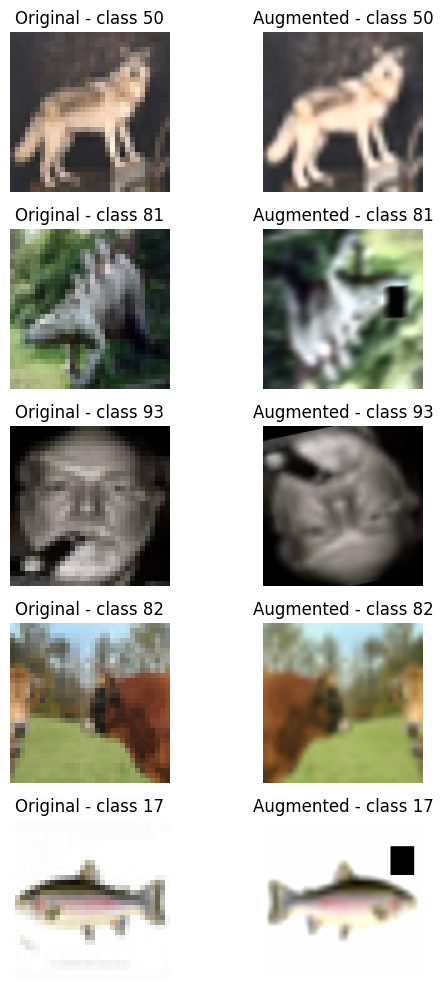

In [6]:
# –ø—Ä–∏–º–µ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–æ –∏ –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π
def show_before_after(dataset_dir, transform, num_classes=5):
    import matplotlib.pyplot as plt

    # –°–ª—É—á–∞–π–Ω–æ –≤—ã–±–∏—Ä–∞–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª–∞—Å—Å–æ–≤
    classes = random.sample(os.listdir(dataset_dir), num_classes)

    fig, axs = plt.subplots(num_classes, 2, figsize=(6, 2 * num_classes))

    for i, class_id in enumerate(classes):
        class_path = os.path.join(dataset_dir, class_id)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)

        # –û—Ä–∏–≥–∏–Ω–∞–ª (–¥–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏)
        image_orig = cv2.imread(image_path)
        image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
        axs[i, 0].imshow(image_orig)
        axs[i, 0].set_title(f"Original - class {class_id}")
        axs[i, 0].axis("off")

        # –ê—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        augmented = transform(image=image_orig)["image"]
        img = augmented.permute(1, 2, 0).numpy()
        img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # –¥–µ-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
        img = (img * 255).clip(0, 255).astype("uint8")

        axs[i, 1].imshow(img)
        axs[i, 1].set_title(f"Augmented - class {class_id}")
        axs[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# –í—ã–∑–æ–≤
show_before_after("data/data/train", train_transform, num_classes=5)


# –ë–ª–æ–∫ 3. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –º–æ–¥–µ–ª–µ–π —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –∏—Ö –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø–æ —ç–ø–æ—Ö–∞–º –∏ —Å –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è–º–∏, –∞ —Ç–∞–∫–∂–µ –≤—ã–≤–æ–¥—ã –ø–æ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏

## 3.1 - —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ train –Ω–∞ train –∏ val

In [6]:
from sklearn.model_selection import train_test_split
import shutil
from tqdm import tqdm

def split_train_val(original_data_dir, new_base_dir, val_size=0.2):
    classes = os.listdir(original_data_dir)
    os.makedirs(f"{new_base_dir}/train", exist_ok=True)
    os.makedirs(f"{new_base_dir}/val", exist_ok=True)

    for cls in tqdm(classes):
        cls_path = os.path.join(original_data_dir, cls)
        images = os.listdir(cls_path)
        train_imgs, val_imgs = train_test_split(images, test_size=val_size, random_state=42)

        os.makedirs(os.path.join(new_base_dir, "train", cls), exist_ok=True)
        os.makedirs(os.path.join(new_base_dir, "val", cls), exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(cls_path, img), os.path.join(new_base_dir, "train", cls, img))
        for img in val_imgs:
            shutil.copy(os.path.join(cls_path, img), os.path.join(new_base_dir, "val", cls, img))

# –í—ã–∑–æ–≤
split_train_val("data/data/train", "data_split", val_size=0.2)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 129.35it/s]


## 3.2 –ú–æ–¥–µ–ª–∏ —Å Transfer Learning

### 3.2.1 —Å –Ω–∞–≤–æ—Ä–æ—á–µ–Ω–Ω—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏

–∏—Å–ø–æ–ª—å–∑—É—é –º–æ–¥–µ–ª—å wide_resnet50_2. —è –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª–∞ —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏ –≤ —á–µ—Ä–Ω–æ–≤–æ–º –±–ª–æ–∫–Ω–æ—Ç–µ, –∏ –∏–º–µ–Ω–Ω–æ —ç—Ç–∞ –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±—è –ª—É—á—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, –ø–æ—ç—Ç–æ–º—É –≤ —Ä–∞–∑–¥–µ–ª–µ —Å transfer learning –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–µ

<ipython-input-8-d983105a82fd>:31: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.72it/s]


–≠–ø–æ—Ö–∞ 1/40, Loss: 4.2532, Train Acc: 10.14%, Val Acc: 59.21%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:50<00:00,  3.75it/s]


–≠–ø–æ—Ö–∞ 2/40, Loss: 3.1013, Train Acc: 27.75%, Val Acc: 68.78%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 3/40, Loss: 2.7446, Train Acc: 30.21%, Val Acc: 73.40%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 4/40, Loss: 2.6494, Train Acc: 32.69%, Val Acc: 73.60%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 5/40, Loss: 2.5065, Train Acc: 33.00%, Val Acc: 74.13%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 6/40, Loss: 2.4025, Train Acc: 40.94%, Val Acc: 76.50%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 7/40, Loss: 2.4089, Train Acc: 40.02%, Val Acc: 75.45%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.66it/s]


–≠–ø–æ—Ö–∞ 8/40, Loss: 2.2727, Train Acc: 41.34%, Val Acc: 76.63%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:52<00:00,  3.64it/s]


–≠–ø–æ—Ö–∞ 9/40, Loss: 2.0981, Train Acc: 41.56%, Val Acc: 77.62%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 10/40, Loss: 2.0740, Train Acc: 46.34%, Val Acc: 77.56%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 11/40, Loss: 2.1789, Train Acc: 40.76%, Val Acc: 76.90%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 2 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 12/40, Loss: 2.0934, Train Acc: 46.11%, Val Acc: 77.03%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 3 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.66it/s]


–≠–ø–æ—Ö–∞ 13/40, Loss: 2.0788, Train Acc: 43.31%, Val Acc: 77.82%
LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:52<00:00,  3.65it/s]


–≠–ø–æ—Ö–∞ 14/40, Loss: 2.1022, Train Acc: 44.89%, Val Acc: 78.09%
LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 15/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 15/40, Loss: 1.9631, Train Acc: 49.38%, Val Acc: 77.89%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 16/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 16/40, Loss: 1.9530, Train Acc: 43.87%, Val Acc: 78.22%
LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 17/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.66it/s]


–≠–ø–æ—Ö–∞ 17/40, Loss: 1.9947, Train Acc: 42.63%, Val Acc: 77.82%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 18/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 18/40, Loss: 1.9671, Train Acc: 47.42%, Val Acc: 79.14%
LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 19/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.66it/s]


–≠–ø–æ—Ö–∞ 19/40, Loss: 1.9644, Train Acc: 38.60%, Val Acc: 79.54%
LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 20/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.67it/s]


–≠–ø–æ—Ö–∞ 20/40, Loss: 1.9810, Train Acc: 43.60%, Val Acc: 78.28%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 21/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 21/40, Loss: 1.9898, Train Acc: 43.55%, Val Acc: 78.81%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 2 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 22/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 22/40, Loss: 1.8976, Train Acc: 38.90%, Val Acc: 79.34%
LR: 2.5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 3 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 23/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:51<00:00,  3.68it/s]


–≠–ø–æ—Ö–∞ 23/40, Loss: 1.8935, Train Acc: 51.71%, Val Acc: 78.09%
LR: 2.5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 4 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥
–°—Ä–∞–±–æ—Ç–∞–ª–∞ —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞

 –õ—É—á—à–∞—è validation accuracy: 79.54%


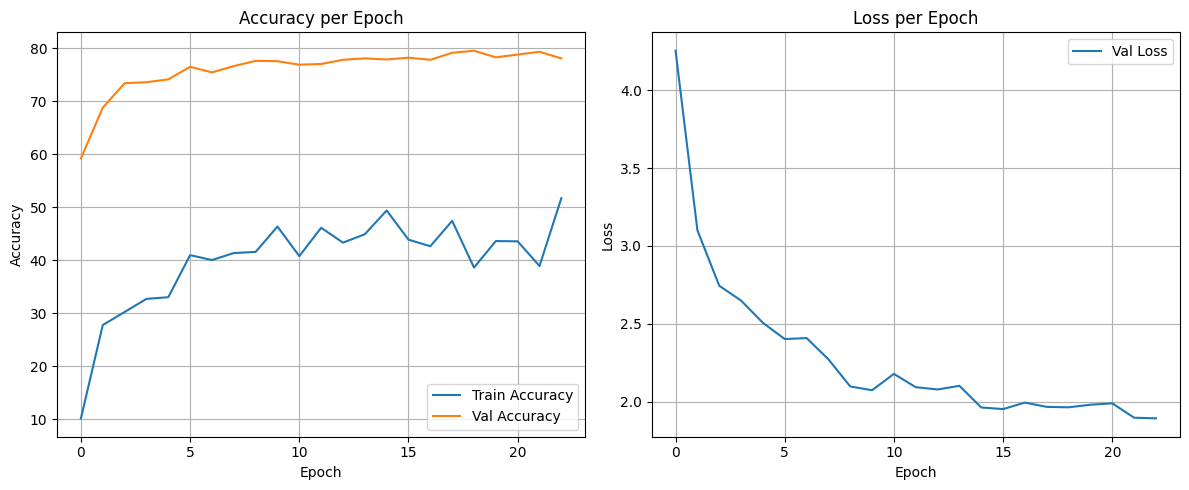

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import cv2
import os
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from tqdm import tqdm

# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
IMG_SIZE = 128
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.3),
    A.HueSaturationValue(p=0.2),
    A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE, p=0.1),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.2),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.2),
    A.MotionBlur(p=0.2),
    A.ElasticTransform(p=0.1),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# Dataset
class CustomImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
def get_stratified_datasets(root_dir, test_size=0.2):
    all_samples = []
    all_labels = []
    class_names = sorted(os.listdir(root_dir))
    for class_id in class_names:
        class_path = os.path.join(root_dir, class_id)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                all_samples.append((fpath, int(class_id)))
                all_labels.append(int(class_id))

    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    train_idx, val_idx = next(splitter.split(all_samples, all_labels))
    train_samples = [all_samples[i] for i in train_idx]
    val_samples = [all_samples[i] for i in val_idx]
    return train_samples, val_samples, class_names

train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")

train_dataset = CustomImageDataset(train_samples, transform=train_transform)
val_dataset = CustomImageDataset(val_samples, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Class Weights
def get_class_weights(samples, num_classes):
    label_counts = Counter([label for _, label in samples])
    class_weights = [0] * num_classes
    total = sum(label_counts.values())
    for i in range(num_classes):
        class_weights[i] = total / (num_classes * label_counts[i])
    return torch.tensor(class_weights, dtype=torch.float)

class_weights = get_class_weights(train_samples, len(class_names)).to(device)

# –ú–æ–¥–µ–ª—å wide_resnet50_2
model = timm.create_model('wide_resnet50_2', pretrained=True, num_classes=len(class_names))
model = model.to(device)

# –†–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å—ë
for param in model.parameters():
    param.requires_grad = True

# Loss
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, weight=class_weights)

# Mixup
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∏ LR Scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞
best_val_acc = 0
early_stop_patience = 4
no_improve_epochs = 0
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    epoch_loss = running_loss / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è + TTA
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            tta_outputs = []
            for tta in [lambda x: x, lambda x: torch.flip(x, dims=[3]), lambda x: torch.flip(x, dims=[2])]:
                tta_inputs = tta(inputs)
                tta_outputs.append(model(tta_inputs))
            outputs = sum(tta_outputs) / len(tta_outputs)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print("LR:", optimizer.param_groups[0]['lr'])

    train_accuracies.append(train_acc)
    val_losses.append(epoch_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_wide_resnet50_2.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        print(f"–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è {no_improve_epochs} —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥")

    if no_improve_epochs >= early_stop_patience:
        print("–°—Ä–∞–±–æ—Ç–∞–ª–∞ —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
        break

print(f"\n –õ—É—á—à–∞—è validation accuracy: {best_val_acc:.2f}%")



# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ train acc –Ω–µ –æ—á–µ–Ω—å —Å—Ç–∞–±–∏–ª–µ–Ω, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º val acc —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –∏ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –ø–æ—Ç–æ–ª–∫–∞ –¥–ª—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏. loss —Ç–∞–∫–∂–µ –≤ —Ü–µ–ª–æ–º –ø–∞–¥–∞–µ—Ç, –ø—Ä–∏ —ç—Ç–æ–º –Ω–µ–º–Ω–æ–≥–æ –∫–æ–ª–µ–±–ª–µ—Ç—Å—è. –ü—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ—Ç, –Ω–∞ –∫–∞–≥–ª–µ —ç—Ç–∞ –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫–æ–π –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ 75%.

–ú–Ω–µ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ train acc –Ω–∞—Å—Ç–æ–ª—å–∫–æ –Ω–∏–∂–µ —á–µ–º validation acc –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∞–≥—Ä–µ—Å—Å–∏–≤–Ω—ã–µ –∏ –º–æ–≥—É—Ç —Å–∏–ª—å–Ω–æ —É—Å–ª–æ–∂–Ω—è—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —á—Ç–æ –∏ –¥–∞–µ—Ç —Ö—É–¥—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ train

### 3.2.2 –±–µ–∑ –Ω–∞–≤–æ—Ä–æ—á–µ–Ω–Ω—ã—Ö –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π (—Ç–æ–ª—å–∫–æ –æ—Ç—Ä–∞–∂–µ–Ω–∏—è)

—Ç—É—Ç –ø—Ä–µ–∂–Ω—è—è –º–æ–¥–µ–ª—å, –Ω–æ –≤ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è—Ö –ø—Ä–æ–ø–∏—Å–∞–Ω—ã —Ç–æ–ª—å–∫–æ –æ—Ç—Ä–∞–∂–µ–Ω–∏—è –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏ –∏ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏. –º–æ–¥–µ–ª—å –Ω–µ –∏–∑–º–µ–Ω—è—é –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è

Epoch 1/40


Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.46it/s, loss=4.11]


–≠–ø–æ—Ö–∞ 1/40, Loss: 4.3633, Train Acc: 11.40%, Val Acc: 33.49%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 2/40


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.34it/s, loss=3.36]


–≠–ø–æ—Ö–∞ 2/40, Loss: 3.6532, Train Acc: 29.28%, Val Acc: 44.38%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 3/40


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.48it/s, loss=2.82]


–≠–ø–æ—Ö–∞ 3/40, Loss: 3.0937, Train Acc: 36.15%, Val Acc: 47.73%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 4/40


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:11<00:00, 20.20it/s, loss=2.21]


–≠–ø–æ—Ö–∞ 4/40, Loss: 2.7258, Train Acc: 40.43%, Val Acc: 51.50%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 5/40


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.52it/s, loss=2.6]


–≠–ø–æ—Ö–∞ 5/40, Loss: 2.4947, Train Acc: 42.92%, Val Acc: 54.18%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 6/40


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.51it/s, loss=3.22]


–≠–ø–æ—Ö–∞ 6/40, Loss: 2.3148, Train Acc: 45.14%, Val Acc: 56.04%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 7/40


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.30it/s, loss=1.79]


–≠–ø–æ—Ö–∞ 7/40, Loss: 2.1842, Train Acc: 47.29%, Val Acc: 58.93%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 8/40


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.33it/s, loss=2.29]


–≠–ø–æ—Ö–∞ 8/40, Loss: 2.0989, Train Acc: 48.78%, Val Acc: 59.44%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 9/40


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.29it/s, loss=2.18]


–≠–ø–æ—Ö–∞ 9/40, Loss: 2.0148, Train Acc: 50.33%, Val Acc: 60.78%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 10/40


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:11<00:00, 20.22it/s, loss=1.93]


–≠–ø–æ—Ö–∞ 10/40, Loss: 1.9344, Train Acc: 51.15%, Val Acc: 61.35%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 11/40


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.56it/s, loss=1.63]


–≠–ø–æ—Ö–∞ 11/40, Loss: 1.8864, Train Acc: 52.10%, Val Acc: 61.30%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 12/40


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.60it/s, loss=1.27]


–≠–ø–æ—Ö–∞ 12/40, Loss: 1.8067, Train Acc: 53.66%, Val Acc: 62.02%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 13/40


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.48it/s, loss=2.35]


–≠–ø–æ—Ö–∞ 13/40, Loss: 1.7852, Train Acc: 54.70%, Val Acc: 61.51%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 14/40


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.56it/s, loss=1.85]


–≠–ø–æ—Ö–∞ 14/40, Loss: 1.7252, Train Acc: 55.98%, Val Acc: 62.69%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 15/40


Epoch 15/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.47it/s, loss=1.74]


–≠–ø–æ—Ö–∞ 15/40, Loss: 1.6991, Train Acc: 57.03%, Val Acc: 62.54%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 16/40


Epoch 16/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.43it/s, loss=1.47]


–≠–ø–æ—Ö–∞ 16/40, Loss: 1.6735, Train Acc: 57.01%, Val Acc: 63.57%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 17/40


Epoch 17/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.65it/s, loss=1.93]


–≠–ø–æ—Ö–∞ 17/40, Loss: 1.6223, Train Acc: 58.23%, Val Acc: 63.00%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 18/40


Epoch 18/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.26it/s, loss=2.26]


–≠–ø–æ—Ö–∞ 18/40, Loss: 1.5895, Train Acc: 58.51%, Val Acc: 63.16%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 19/40


Epoch 19/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.26it/s, loss=1.92]


–≠–ø–æ—Ö–∞ 19/40, Loss: 1.5825, Train Acc: 59.28%, Val Acc: 65.43%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 20/40


Epoch 20/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.33it/s, loss=1.32]


–≠–ø–æ—Ö–∞ 20/40, Loss: 1.5561, Train Acc: 58.73%, Val Acc: 64.14%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 21/40


Epoch 21/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.16it/s, loss=1.56]


–≠–ø–æ—Ö–∞ 21/40, Loss: 1.5151, Train Acc: 59.98%, Val Acc: 64.09%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 22/40


Epoch 22/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.41it/s, loss=1.71]


–≠–ø–æ—Ö–∞ 22/40, Loss: 1.4922, Train Acc: 60.51%, Val Acc: 64.19%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 23/40


Epoch 23/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.11it/s, loss=1.47]


–≠–ø–æ—Ö–∞ 23/40, Loss: 1.4511, Train Acc: 62.02%, Val Acc: 65.07%
LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 24/40


Epoch 24/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:11<00:00, 19.82it/s, loss=1.83]


–≠–ø–æ—Ö–∞ 24/40, Loss: 1.4368, Train Acc: 61.82%, Val Acc: 64.81%
LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 25/40


Epoch 25/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.19it/s, loss=1.92]


–≠–ø–æ—Ö–∞ 25/40, Loss: 1.4204, Train Acc: 62.00%, Val Acc: 65.33%
LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 26/40


Epoch 26/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.30it/s, loss=1.96]


–≠–ø–æ—Ö–∞ 26/40, Loss: 1.4113, Train Acc: 62.56%, Val Acc: 65.07%
LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 27/40


Epoch 27/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.30it/s, loss=1.61]


–≠–ø–æ—Ö–∞ 27/40, Loss: 1.4063, Train Acc: 62.26%, Val Acc: 65.12%
LR: 2.5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 28/40


Epoch 28/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.45it/s, loss=1.32]


–≠–ø–æ—Ö–∞ 28/40, Loss: 1.3876, Train Acc: 62.77%, Val Acc: 64.65%
LR: 2.5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 29/40


Epoch 29/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.49it/s, loss=1.99]


–≠–ø–æ—Ö–∞ 29/40, Loss: 1.3723, Train Acc: 63.38%, Val Acc: 65.12%
LR: 2.5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 30/40


Epoch 30/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 18.87it/s, loss=1.72]


–≠–ø–æ—Ö–∞ 30/40, Loss: 1.3907, Train Acc: 62.64%, Val Acc: 65.07%
LR: 2.5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 31/40


Epoch 31/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.01it/s, loss=1.87]


–≠–ø–æ—Ö–∞ 31/40, Loss: 1.3835, Train Acc: 63.17%, Val Acc: 65.02%
LR: 1.25e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 32/40


Epoch 32/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 18.50it/s, loss=1.55]


–≠–ø–æ—Ö–∞ 32/40, Loss: 1.3491, Train Acc: 63.55%, Val Acc: 64.86%
LR: 1.25e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 33/40


Epoch 33/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 18.58it/s, loss=1.62]


–≠–ø–æ—Ö–∞ 33/40, Loss: 1.3535, Train Acc: 63.59%, Val Acc: 64.55%
LR: 1.25e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 34/40


Epoch 34/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.04it/s, loss=1.15]


–≠–ø–æ—Ö–∞ 34/40, Loss: 1.3678, Train Acc: 63.56%, Val Acc: 65.58%
LR: 1.25e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
Epoch 35/40


Epoch 35/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 18.29it/s, loss=1.12]


–≠–ø–æ—Ö–∞ 35/40, Loss: 1.3610, Train Acc: 63.64%, Val Acc: 65.12%
LR: 1.25e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 36/40


Epoch 36/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.13it/s, loss=1.47]


–≠–ø–æ—Ö–∞ 36/40, Loss: 1.3400, Train Acc: 63.88%, Val Acc: 65.22%
LR: 1.25e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 37/40


Epoch 37/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.02it/s, loss=1.87]


–≠–ø–æ—Ö–∞ 37/40, Loss: 1.3710, Train Acc: 63.34%, Val Acc: 64.76%
LR: 1.25e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 38/40


Epoch 38/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.15it/s, loss=1.5]


–≠–ø–æ—Ö–∞ 38/40, Loss: 1.3447, Train Acc: 64.05%, Val Acc: 65.22%
LR: 6.25e-06
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 39/40


Epoch 39/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 18.95it/s, loss=1.85]


–≠–ø–æ—Ö–∞ 39/40, Loss: 1.3525, Train Acc: 64.20%, Val Acc: 64.65%
LR: 6.25e-06
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è
Epoch 40/40


Epoch 40/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237/237 [00:12<00:00, 19.07it/s, loss=0.742]


–≠–ø–æ—Ö–∞ 40/40, Loss: 1.3339, Train Acc: 63.84%, Val Acc: 65.22%
LR: 6.25e-06
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è

 –õ—É—á—à–∞—è validation accuracy: 65.58%


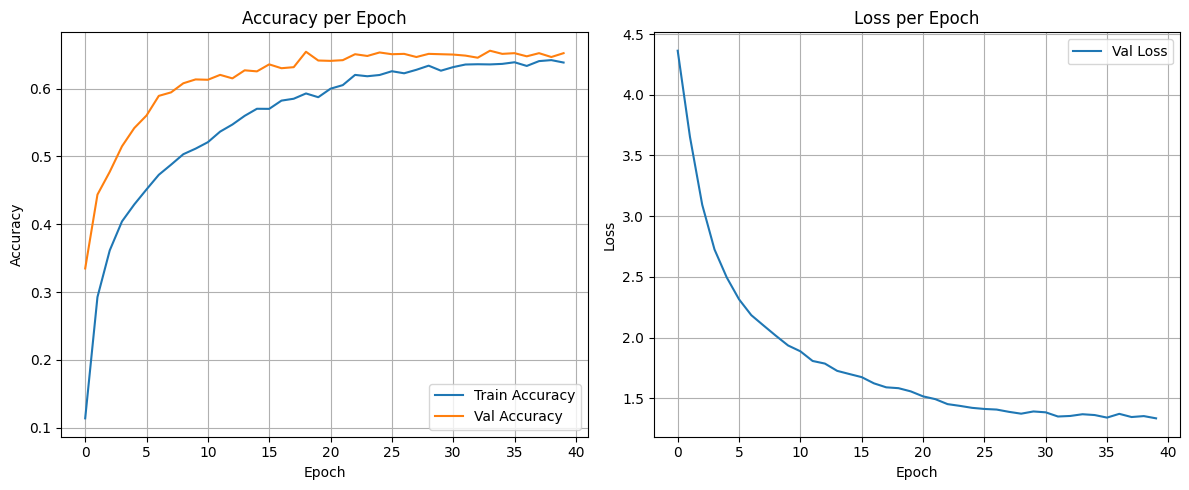

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
import copy
import os

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# –ü—É—Ç–∏ –∫ –¥–∞–Ω–Ω—ã–º
train_dir = 'data_split/train'
val_dir = 'data_split/val'

# –ü—Ä–æ—Å—Ç—ã–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ + —É–º–µ–Ω—å—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
image_size = 128

train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# –ú–æ–¥–µ–ª—å ResNet50 —Å transfer learning
resnet = models.resnet50(weights='IMAGENET1K_V2')
for param in resnet.parameters():
    param.requires_grad = False

# –ó–∞–º–µ–Ω–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
num_classes = len(train_dataset.classes)
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, num_classes)
)
resnet = resnet.to(device)

# –û–±—É—á–µ–Ω–∏–µ
epochs = 40
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5, verbose=True)

best_model_wts = copy.deepcopy(resnet.state_dict())
best_acc = 0.0

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    resnet.train()
    running_loss, running_corrects = 0.0, 0

    loop = tqdm(train_loader)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        loop.set_description(f'Epoch {epoch+1}/{epochs}')
        loop.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    # –í–∞–ª–∏–¥–∞—Ü–∏—è
    resnet.eval()
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)

    val_acc = val_corrects.double() / len(val_dataset)
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2%}, Val Acc: {val_acc:.2%}")
    print(f"LR: {optimizer.param_groups[0]['lr']}")

    val_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())
    val_accuracies.append(val_acc.item())

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å, –µ—Å–ª–∏ —É–ª—É—á—à–∏–ª–∞—Å—å
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = copy.deepcopy(resnet.state_dict())
        torch.save(resnet.state_dict(), 'best_resnet50_simple_aug.pth')
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
    else:
        print("–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è")

print(f"\n –õ—É—á—à–∞—è validation accuracy: {best_acc:.2%}")
resnet.load_state_dict(best_model_wts)


# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–≠—Ç–∞ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω–µ–µ, –Ω–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ö—É–∂–µ —á–µ–º —É –º–æ–¥–µ–ª–∏ —Å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏. –¢–∞–∫–∂–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ—Ç.

–¢—É—Ç train acc –Ω–µ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –Ω–∏–∑–∫–∏–π –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å val acc, –∫–∞–∫ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–æ–¥–µ–ª–∏. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ —Ç–æ–º, —á—Ç–æ —Ç–µ –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è train acc –≤–æ–∑–Ω–∏–∫–∞–ª–∏ –∏–∑-–∑–∞ —Å–ª–æ–∂–Ω—ã—Ö –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π. –í–æ–∑–º–æ–∂–Ω–æ, —Å—Ç–æ–∏—Ç –Ω–µ–º–Ω–æ–≥–æ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

### —Å –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–º –∞–ø—Å–∫–µ–π–ª–∏–Ω–≥–æ–º –∏ —Å –Ω–∞–≤–æ—Ä–æ—á–µ–Ω–Ω—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏

—Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–µ–∂–Ω—é—é –º–æ–¥–µ–ª—å —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏ –∏–∑ –ø—É–Ω–∫—Ç–∞ 3.2.1, –Ω–æ –¥–æ–±–∞–≤–∏–º –∞–ø—Å–∫–µ–π–ª–∏–Ω–≥

<ipython-input-12-434cc32f0aaf>:25: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.31it/s]


Epoch 1/40, Loss: 4.1730, Train Acc: 12.28%, Val Acc: 60.33%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.33it/s]


Epoch 2/40, Loss: 3.0119, Train Acc: 28.15%, Val Acc: 71.68%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:58<00:00,  3.27it/s]


Epoch 3/40, Loss: 2.7030, Train Acc: 29.73%, Val Acc: 74.85%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 4/40, Loss: 2.4776, Train Acc: 32.43%, Val Acc: 76.37%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.36it/s]


Epoch 5/40, Loss: 2.4409, Train Acc: 35.13%, Val Acc: 77.69%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.34it/s]


Epoch 6/40, Loss: 2.4453, Train Acc: 35.02%, Val Acc: 78.09%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.36it/s]


Epoch 7/40, Loss: 2.2636, Train Acc: 35.50%, Val Acc: 77.69%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 8/40, Loss: 2.2182, Train Acc: 39.41%, Val Acc: 77.76%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 9/40, Loss: 2.2147, Train Acc: 43.70%, Val Acc: 78.22%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.34it/s]


Epoch 10/40, Loss: 2.1124, Train Acc: 42.46%, Val Acc: 77.36%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 11/40, Loss: 2.0168, Train Acc: 43.40%, Val Acc: 78.81%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.34it/s]


Epoch 12/40, Loss: 2.0783, Train Acc: 42.35%, Val Acc: 77.56%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.36it/s]


Epoch 13/40, Loss: 2.2077, Train Acc: 40.02%, Val Acc: 77.82%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.36it/s]


Epoch 14/40, Loss: 2.1010, Train Acc: 44.82%, Val Acc: 79.01%
Current LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 15/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.33it/s]


Epoch 15/40, Loss: 2.1197, Train Acc: 41.90%, Val Acc: 78.42%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 16/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 16/40, Loss: 2.0510, Train Acc: 46.64%, Val Acc: 78.48%
Current LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 17/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.37it/s]


Epoch 17/40, Loss: 2.0091, Train Acc: 44.03%, Val Acc: 78.68%
Current LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 3 —ç–ø–æ—Ö


Epoch 18/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.34it/s]


Epoch 18/40, Loss: 2.0006, Train Acc: 46.44%, Val Acc: 79.60%
Current LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 19/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [01:07<00:00,  2.81it/s]


Epoch 19/40, Loss: 2.0163, Train Acc: 41.59%, Val Acc: 80.13%
Current LR: 5e-05
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 20/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 20/40, Loss: 1.9015, Train Acc: 47.73%, Val Acc: 79.67%
Current LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 21/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.31it/s]


Epoch 21/40, Loss: 1.9468, Train Acc: 45.52%, Val Acc: 79.93%
Current LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 22/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.32it/s]


Epoch 22/40, Loss: 1.8186, Train Acc: 46.77%, Val Acc: 79.74%
Current LR: 2.5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 3 —ç–ø–æ—Ö


Epoch 23/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.35it/s]


Epoch 23/40, Loss: 1.8701, Train Acc: 39.95%, Val Acc: 79.47%
Current LR: 2.5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 4 —ç–ø–æ—Ö
–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞

 –õ—É—á—à–∞—è validation accuracy: 80.13%


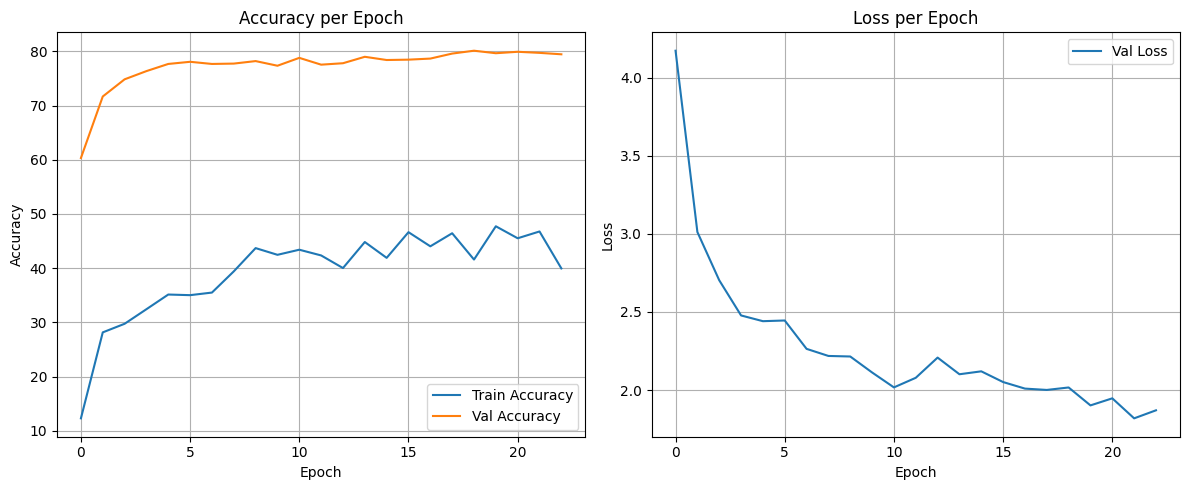

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import cv2
import os
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
IMG_SIZE = 128
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE, interpolation=cv2.INTER_LANCZOS4),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.3),
    A.HueSaturationValue(p=0.2),
    A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE, p=0.1),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.2),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.2),
    A.MotionBlur(p=0.2),
    A.ElasticTransform(p=0.1),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE, interpolation=cv2.INTER_LANCZOS4),
    A.Normalize(),
    ToTensorV2()
])

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# Dataset
class CustomImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
def get_stratified_datasets(root_dir, test_size=0.2):
    all_samples = []
    all_labels = []
    class_names = sorted(os.listdir(root_dir))
    for class_id in class_names:
        class_path = os.path.join(root_dir, class_id)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                all_samples.append((fpath, int(class_id)))
                all_labels.append(int(class_id))

    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    train_idx, val_idx = next(splitter.split(all_samples, all_labels))
    train_samples = [all_samples[i] for i in train_idx]
    val_samples = [all_samples[i] for i in val_idx]
    return train_samples, val_samples, class_names

train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")

train_dataset = CustomImageDataset(train_samples, transform=train_transform)
val_dataset = CustomImageDataset(val_samples, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Class Weights
def get_class_weights(samples, num_classes):
    label_counts = Counter([label for _, label in samples])
    class_weights = [0] * num_classes
    total = sum(label_counts.values())
    for i in range(num_classes):
        class_weights[i] = total / (num_classes * label_counts[i])
    return torch.tensor(class_weights, dtype=torch.float)

class_weights = get_class_weights(train_samples, len(class_names)).to(device)

# –ú–æ–¥–µ–ª—å wide_resnet50_2
model = timm.create_model('wide_resnet50_2', pretrained=True, num_classes=len(class_names))
model = model.to(device)

# –†–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å—ë
for param in model.parameters():
    param.requires_grad = True

# Loss
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, weight=class_weights)

# Mixup
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∏ LR Scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞
best_val_acc = 0
early_stop_patience = 4
no_improve_epochs = 0
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    epoch_loss = running_loss / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è + TTA
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            tta_outputs = []
            for tta in [lambda x: x, lambda x: torch.flip(x, dims=[3]), lambda x: torch.flip(x, dims=[2])]:
                tta_inputs = tta(inputs)
                tta_outputs.append(model(tta_inputs))
            outputs = sum(tta_outputs) / len(tta_outputs)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print("Current LR:", optimizer.param_groups[0]['lr'])

    train_accuracies.append(train_acc)
    val_losses.append(epoch_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_wide_resnet50_2_upscaling.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        print(f"–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ {no_improve_epochs} —ç–ø–æ—Ö")

    if no_improve_epochs >= early_stop_patience:
        print("–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
        break

print(f"\n –õ—É—á—à–∞—è validation accuracy: {best_val_acc:.2f}%")



# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–±—Å–æ–ª—é—Ç–Ω–æ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏–∑ –ø—É–Ω–∫—Ç–∞ 3.2.1, –Ω–æ –ª—É—á—à–∞—è val acc –Ω–µ–º–Ω–æ–≥–æ –≤—ã—à–µ. –í—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Ç–∞–∫–∏–µ –∂–µ

### –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π

–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å —Ç–∞–∫—É—é –∂–µ –º–æ–¥–µ–ª—å –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:49<00:00,  3.85it/s]


–≠–ø–æ—Ö–∞ 1/40, Loss: 3.9835, Train Acc: 15.17%, Val Acc: 64.62%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:49<00:00,  3.87it/s]


–≠–ø–æ—Ö–∞ 2/40, Loss: 2.6768, Train Acc: 35.55%, Val Acc: 73.66%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.90it/s]


–≠–ø–æ—Ö–∞ 3/40, Loss: 2.1537, Train Acc: 38.68%, Val Acc: 75.31%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.88it/s]


–≠–ø–æ—Ö–∞ 4/40, Loss: 2.0341, Train Acc: 41.92%, Val Acc: 76.50%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.89it/s]


–≠–ø–æ—Ö–∞ 5/40, Loss: 2.0736, Train Acc: 38.68%, Val Acc: 76.30%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.91it/s]


–≠–ø–æ—Ö–∞ 6/40, Loss: 2.0028, Train Acc: 47.04%, Val Acc: 78.02%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.88it/s]


–≠–ø–æ—Ö–∞ 7/40, Loss: 1.8927, Train Acc: 49.22%, Val Acc: 76.90%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.90it/s]


–≠–ø–æ—Ö–∞ 8/40, Loss: 1.9710, Train Acc: 43.59%, Val Acc: 76.44%
LR: 0.0001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.90it/s]


–≠–ø–æ—Ö–∞ 9/40, Loss: 1.8765, Train Acc: 46.61%, Val Acc: 77.16%
LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 3 —ç–ø–æ—Ö


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:48<00:00,  3.90it/s]


–≠–ø–æ—Ö–∞ 10/40, Loss: 1.8497, Train Acc: 51.03%, Val Acc: 77.76%
LR: 5e-05
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 4 —ç–ø–æ—Ö
–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞

 –õ—É—á—à–∞—è validation accuracy: 78.02%


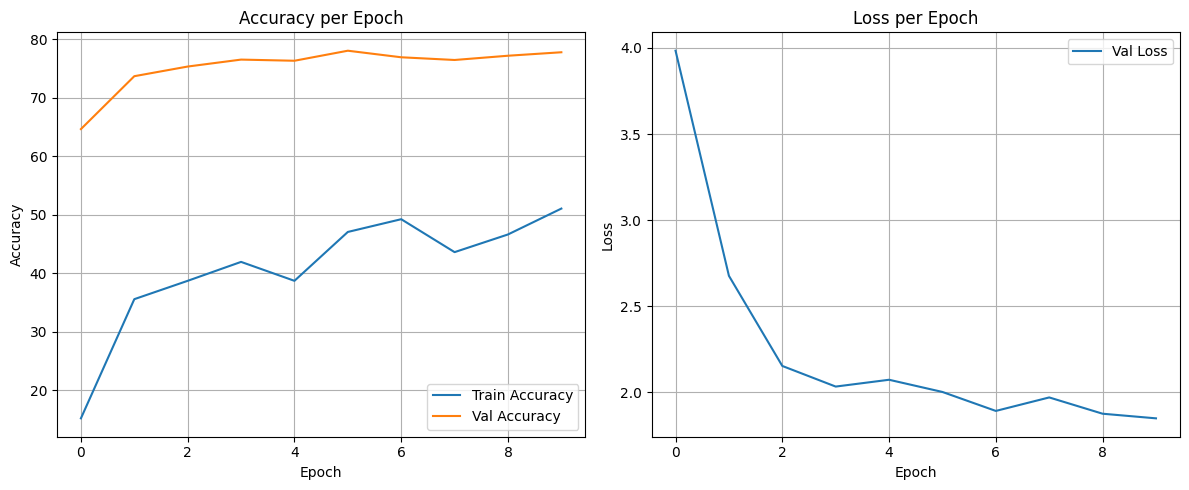

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import cv2
import os
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from tqdm import tqdm

# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ (—Ç–µ–ø–µ—Ä—å ‚Äî —Ç–æ–ª—å–∫–æ –±–∞–∑–æ–≤—ã–µ, –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π)
IMG_SIZE = 128
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# Dataset
class CustomImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
def get_stratified_datasets(root_dir, test_size=0.2):
    all_samples = []
    all_labels = []
    class_names = sorted(os.listdir(root_dir))
    for class_id in class_names:
        class_path = os.path.join(root_dir, class_id)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                all_samples.append((fpath, int(class_id)))
                all_labels.append(int(class_id))

    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    train_idx, val_idx = next(splitter.split(all_samples, all_labels))
    train_samples = [all_samples[i] for i in train_idx]
    val_samples = [all_samples[i] for i in val_idx]
    return train_samples, val_samples, class_names

train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")

train_dataset = CustomImageDataset(train_samples, transform=train_transform)
val_dataset = CustomImageDataset(val_samples, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Class Weights
def get_class_weights(samples, num_classes):
    label_counts = Counter([label for _, label in samples])
    class_weights = [0] * num_classes
    total = sum(label_counts.values())
    for i in range(num_classes):
        class_weights[i] = total / (num_classes * label_counts[i])
    return torch.tensor(class_weights, dtype=torch.float)

class_weights = get_class_weights(train_samples, len(class_names)).to(device)

# –ú–æ–¥–µ–ª—å wide_resnet50_2
model = timm.create_model('wide_resnet50_2', pretrained=True, num_classes=len(class_names))
model = model.to(device)

# –†–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å—ë
for param in model.parameters():
    param.requires_grad = True

# Loss
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, weight=class_weights)

# Mixup
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∏ LR Scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞
best_val_acc = 0
early_stop_patience = 4
no_improve_epochs = 0
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    epoch_loss = running_loss / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è + TTA
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            tta_outputs = []
            for tta in [lambda x: x, lambda x: torch.flip(x, dims=[3]), lambda x: torch.flip(x, dims=[2])]:
                tta_inputs = tta(inputs)
                tta_outputs.append(model(tta_inputs))
            outputs = sum(tta_outputs) / len(tta_outputs)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print("LR:", optimizer.param_groups[0]['lr'])

    train_accuracies.append(train_acc)
    val_losses.append(epoch_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_wide_resnet50_2_no_aug.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        print(f"–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ {no_improve_epochs} —ç–ø–æ—Ö")

    if no_improve_epochs >= early_stop_patience:
        print("–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
        break

print(f"\n –õ—É—á—à–∞—è validation accuracy: {best_val_acc:.2f}%")



# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 3.3 –ë–µ–∑ Transfer learning

–í —ç—Ç–æ–º –±–ª–æ–∫–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∞ –¥—Ä—É–≥–∞—è –º–æ–¥–µ–ª—å, –Ω–∞–ø–∏—Å–∞–Ω–Ω–∞—è –±–µ–∑ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è TL, —Å —Ä–∞–∑–Ω—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏, —Å –ø–æ–¥—Ä–æ–±–Ω—ã–º –≤—ã–≤–æ–¥–æ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π –∏ –∞–Ω–∞–ª–∏–∑–æ–º –∏—Å—Ö–æ–¥–æ–≤

### 3.3.1 —Å –Ω–∞–≤–æ—Ä–æ—á–µ–Ω–Ω—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏

–ò—Å–ø–æ–ª—å–∑—É—é –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫–∞–∫ –≤ 3.2 –¥–ª—è –¥—Ä—É–≥–æ–π –º–æ–¥–µ–ª–∏

<ipython-input-10-f3ec8cd91ff8>:35: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.80it/s]


–≠–ø–æ—Ö–∞ 1, Train Acc: 5.22%, Val Acc: 7.33%, Val Loss: 4.0701
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  6.00it/s]


–≠–ø–æ—Ö–∞ 2, Train Acc: 7.01%, Val Acc: 8.05%, Val Loss: 4.0207
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.98it/s]


–≠–ø–æ—Ö–∞ 3, Train Acc: 8.20%, Val Acc: 8.72%, Val Loss: 3.9600
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 4, Train Acc: 9.44%, Val Acc: 10.42%, Val Loss: 3.9056
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.75it/s]


–≠–ø–æ—Ö–∞ 5, Train Acc: 9.83%, Val Acc: 12.23%, Val Loss: 3.7626
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  6.00it/s]


–≠–ø–æ—Ö–∞ 6, Train Acc: 10.74%, Val Acc: 10.99%, Val Loss: 3.7843
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.87it/s]


–≠–ø–æ—Ö–∞ 7, Train Acc: 11.63%, Val Acc: 13.36%, Val Loss: 3.7373
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.70it/s]


–≠–ø–æ—Ö–∞ 8, Train Acc: 13.03%, Val Acc: 13.83%, Val Loss: 3.6053
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.64it/s]


–≠–ø–æ—Ö–∞ 9, Train Acc: 13.89%, Val Acc: 15.38%, Val Loss: 3.5762
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.77it/s]


–≠–ø–æ—Ö–∞ 10, Train Acc: 14.67%, Val Acc: 18.01%, Val Loss: 3.4642
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.77it/s]


–≠–ø–æ—Ö–∞ 11, Train Acc: 16.13%, Val Acc: 18.06%, Val Loss: 3.3530
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.56it/s]


–≠–ø–æ—Ö–∞ 12, Train Acc: 17.51%, Val Acc: 19.87%, Val Loss: 3.3055
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.42it/s]


–≠–ø–æ—Ö–∞ 13, Train Acc: 19.04%, Val Acc: 21.36%, Val Loss: 3.1974
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.47it/s]


–≠–ø–æ—Ö–∞ 14, Train Acc: 19.96%, Val Acc: 22.50%, Val Loss: 3.1847
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 15/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.53it/s]


–≠–ø–æ—Ö–∞ 15, Train Acc: 21.72%, Val Acc: 23.79%, Val Loss: 3.0586
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 16/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.78it/s]


–≠–ø–æ—Ö–∞ 16, Train Acc: 23.52%, Val Acc: 22.96%, Val Loss: 3.1165
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 17/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.84it/s]


–≠–ø–æ—Ö–∞ 17, Train Acc: 25.96%, Val Acc: 26.26%, Val Loss: 3.0074
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 18/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:22<00:00,  5.33it/s]


–≠–ø–æ—Ö–∞ 18, Train Acc: 26.91%, Val Acc: 28.07%, Val Loss: 2.8337
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 19/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.51it/s]


–≠–ø–æ—Ö–∞ 19, Train Acc: 28.90%, Val Acc: 28.84%, Val Loss: 2.8452
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 20/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.50it/s]


–≠–ø–æ—Ö–∞ 20, Train Acc: 29.82%, Val Acc: 29.72%, Val Loss: 2.8455
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 21/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 21, Train Acc: 31.46%, Val Acc: 31.53%, Val Loss: 2.6959
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 22/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.73it/s]


–≠–ø–æ—Ö–∞ 22, Train Acc: 33.61%, Val Acc: 30.91%, Val Loss: 2.6893
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 23/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.54it/s]


–≠–ø–æ—Ö–∞ 23, Train Acc: 33.90%, Val Acc: 33.28%, Val Loss: 2.6423
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 24/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.50it/s]


–≠–ø–æ—Ö–∞ 24, Train Acc: 35.05%, Val Acc: 33.54%, Val Loss: 2.5927
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 25/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.54it/s]


–≠–ø–æ—Ö–∞ 25, Train Acc: 37.30%, Val Acc: 34.93%, Val Loss: 2.5566
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 26/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.47it/s]


–≠–ø–æ—Ö–∞ 26, Train Acc: 38.42%, Val Acc: 37.15%, Val Loss: 2.4418
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 27/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.61it/s]


–≠–ø–æ—Ö–∞ 27, Train Acc: 38.84%, Val Acc: 35.81%, Val Loss: 2.5537
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 28/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.76it/s]


–≠–ø–æ—Ö–∞ 28, Train Acc: 40.52%, Val Acc: 38.18%, Val Loss: 2.4338
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 29/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.67it/s]


–≠–ø–æ—Ö–∞ 29, Train Acc: 40.94%, Val Acc: 38.80%, Val Loss: 2.3925
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 30/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.60it/s]


–≠–ø–æ—Ö–∞ 30, Train Acc: 42.68%, Val Acc: 38.34%, Val Loss: 2.4303
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 31/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.58it/s]


–≠–ø–æ—Ö–∞ 31, Train Acc: 43.11%, Val Acc: 40.92%, Val Loss: 2.2943
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 32/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.80it/s]


–≠–ø–æ—Ö–∞ 32, Train Acc: 44.72%, Val Acc: 38.80%, Val Loss: 2.3818
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 33/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.61it/s]


–≠–ø–æ—Ö–∞ 33, Train Acc: 46.06%, Val Acc: 39.01%, Val Loss: 2.4001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 34/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.64it/s]


–≠–ø–æ—Ö–∞ 34, Train Acc: 45.71%, Val Acc: 41.02%, Val Loss: 2.3324
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 35/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.61it/s]


–≠–ø–æ—Ö–∞ 35, Train Acc: 47.73%, Val Acc: 41.59%, Val Loss: 2.2551
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 36/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.66it/s]


–≠–ø–æ—Ö–∞ 36, Train Acc: 48.84%, Val Acc: 42.57%, Val Loss: 2.2474
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 37/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.51it/s]


–≠–ø–æ—Ö–∞ 37, Train Acc: 49.29%, Val Acc: 41.69%, Val Loss: 2.3229
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 38/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.62it/s]


–≠–ø–æ—Ö–∞ 38, Train Acc: 50.52%, Val Acc: 43.55%, Val Loss: 2.1864
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 39/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:21<00:00,  5.62it/s]


–≠–ø–æ—Ö–∞ 39, Train Acc: 51.37%, Val Acc: 42.11%, Val Loss: 2.2691
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 40/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.68it/s]


–≠–ø–æ—Ö–∞ 40, Train Acc: 51.40%, Val Acc: 42.72%, Val Loss: 2.1984
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ 2 —ç–ø–æ—Ö


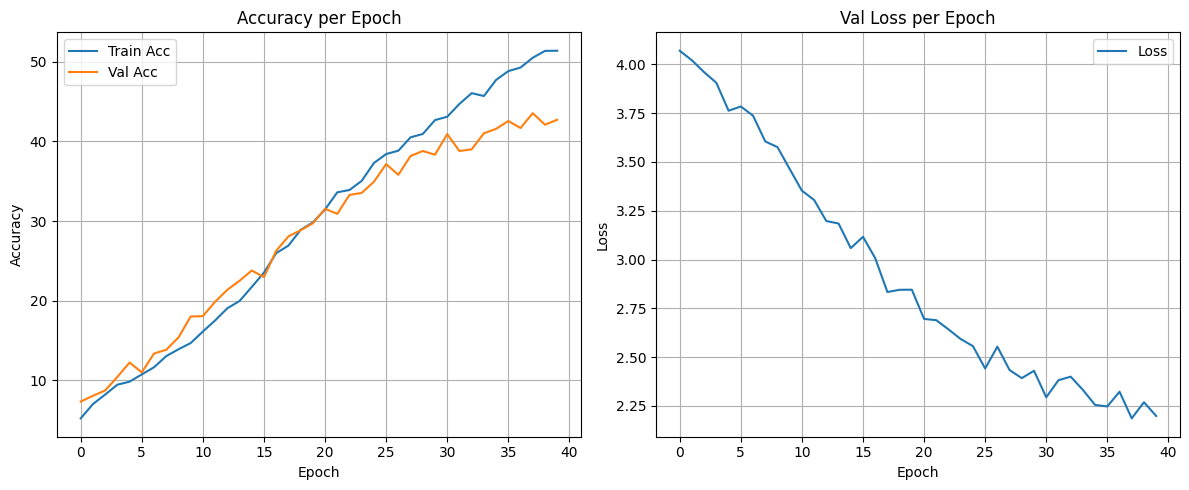

In [ ]:
import os
import random
import numpy as np
import shutil
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.datasets import ImageFolder

import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import matplotlib.pyplot as plt

# ========= 1. –ù–∞—Å—Ç—Ä–æ–π–∫–∏ =========
IMG_SIZE = 128
BATCH_SIZE = 64
NUM_CLASSES = 100
NUM_EPOCHS = 40
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ========= 2. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ =========
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.3),
    A.HueSaturationValue(p=0.2),
    A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE, p=0.1),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.2),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.2),
    A.MotionBlur(p=0.2),
    A.ElasticTransform(p=0.1),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# ========= 3. –û–±—ë—Ä—Ç–∫–∞ –ø–æ–¥ albumentations =========
class AlbumentationsDataset(ImageFolder):
    def __init__(self, root, transform=None):
        super().__init__(root)
        self.albumentations_transform = transform

    def __getitem__(self, index):
        path, label = self.samples[index]
        image = Image.open(path).convert("RGB")
        image = np.array(image)

        if self.albumentations_transform:
            augmented = self.albumentations_transform(image=image)
            image = augmented['image']

        return image, label

# ========= 4. –î–∞—Ç–∞—Å–µ—Ç—ã –∏ –∑–∞–≥—Ä—É–∑—á–∏–∫–∏ =========
train_dataset = AlbumentationsDataset("data_split/train", transform=train_transform)
val_dataset = AlbumentationsDataset("data_split/val", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# ========= 5. –ú–æ–¥–µ–ª—å =========
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return self.relu(out)

class SimpleResNet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(32, 64, 2)
        self.layer2 = self._make_layer(64, 128, 2)
        self.layer3 = self._make_layer(128, 256, 2)

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_c, out_c, stride):
        return nn.Sequential(
            ResidualBlock(in_c, out_c, stride),
            ResidualBlock(out_c, out_c)
        )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.pool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)

# ========= 6. –û–±—É—á–µ–Ω–∏–µ =========
model = SimpleResNet(num_classes=NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)

best_val_acc = 0
no_improve_epochs = 0
early_stop_patience = 4

train_accuracies, val_accuracies = [], []
val_losses = []

for epoch in range(1, NUM_EPOCHS + 1):
    model.train()
    running_loss, correct, total = 0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch}/{NUM_EPOCHS}")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_accuracies.append(train_acc)

    # –í–∞–ª–∏–¥–∞—Ü–∏—è
    model.eval()
    val_loss_total, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss_total += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100. * val_correct / val_total
    val_accuracies.append(val_acc)
    val_loss = val_loss_total / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, Val Loss: {val_loss:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        no_improve_epochs = 0
        torch.save(model.state_dict(), "model_no_tl.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
    else:
        no_improve_epochs += 1
        print(f"–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏–π —É–∂–µ {no_improve_epochs} —ç–ø–æ—Ö")
        if no_improve_epochs >= early_stop_patience:
            print("–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
            break

# ========= 7. –ì—Ä–∞—Ñ–∏–∫–∏ =========
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(val_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Val Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


–≠—Ç–∞ –º–æ–¥–µ–ª—å –Ω–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç —Ç–∞–∫–∏—Ö –≤—ã—Å–æ–∫–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –∫–∞–∫ wide_resnet, –∫–æ—Ç–æ—Ä—É—é —è –∏–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏. –ü—Ä–∏ —ç—Ç–æ–º –º–æ–¥–µ–ª—å –∑–∞ 40 —ç–ø–æ—Ö –Ω–µ –¥–æ—Å—Ç–∏–≥–ª–∞ "–ø–æ—Ç–æ–ª–∫–∞", accuracy (–∫–∞–∫ train, —Ç–∞–∫ –∏ val) –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ —Ä–∞—Å—Ç–∏.

–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —ç—Ç–æ, —è –¥—É–º–∞—é, —á—Ç–æ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–ø–æ—Ö –Ω–µ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ —Ö–æ—Ä–æ—à–µ–º—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É, –ø–æ—Ç–æ–º—É —á—Ç–æ —É–∂–µ –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ. –û–± —ç—Ç–æ–º –≥–æ–≤–æ—Ä–∏—Ç —Ç–æ, —á—Ç–æ train acc –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–∞—Å—Ç–∏ –±—ã—Å—Ç—Ä–µ–µ val acc. –ï—Å–ª–∏ –ø–æ–±–æ—Ä–æ—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –¥–æ—Å—Ç–∏—á—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –Ω–æ –æ–Ω–∞ –≤—Å–µ —Ä–∞–≤–Ω–æ –æ–±—É—á–∞–µ—Ç—Å—è –º–µ–¥–ª–µ–Ω–Ω–µ–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π

### 3.3.2 –±–µ–∑ –Ω–∞–≤–æ—Ä–æ—á–µ–Ω–Ω—ã—Ö –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π (—Ç–æ–ª—å–∫–æ –æ—Ç—Ä–∞–∂–µ–Ω–∏—è)

–¢–∞–∫–∂–µ –º–æ–¥–µ–ª—å –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π, —á—Ç–æ–±—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π

Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.80it/s]


–≠–ø–æ—Ö–∞ 1/40, Loss: 4.2061, Train Acc: 6.85%, Val Acc: 8.77%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.84it/s]


–≠–ø–æ—Ö–∞ 2/40, Loss: 3.9874, Train Acc: 8.98%, Val Acc: 9.34%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.87it/s]


–≠–ø–æ—Ö–∞ 3/40, Loss: 3.9058, Train Acc: 10.09%, Val Acc: 9.29%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.93it/s]


–≠–ø–æ—Ö–∞ 4/40, Loss: 3.8574, Train Acc: 10.90%, Val Acc: 11.15%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.96it/s]


–≠–ø–æ—Ö–∞ 5/40, Loss: 3.7994, Train Acc: 11.25%, Val Acc: 11.61%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.85it/s]


–≠–ø–æ—Ö–∞ 6/40, Loss: 3.7310, Train Acc: 12.82%, Val Acc: 11.61%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 7/40, Loss: 3.6566, Train Acc: 14.08%, Val Acc: 13.83%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 8/40, Loss: 3.6145, Train Acc: 14.50%, Val Acc: 13.36%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 9/40, Loss: 3.5457, Train Acc: 15.54%, Val Acc: 14.71%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 10/40, Loss: 3.4940, Train Acc: 16.55%, Val Acc: 12.59%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 11/40, Loss: 3.4068, Train Acc: 17.91%, Val Acc: 17.39%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.96it/s]


–≠–ø–æ—Ö–∞ 12/40, Loss: 3.3352, Train Acc: 18.71%, Val Acc: 18.01%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.82it/s]


–≠–ø–æ—Ö–∞ 13/40, Loss: 3.2475, Train Acc: 20.43%, Val Acc: 18.58%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 14/40, Loss: 3.1384, Train Acc: 22.75%, Val Acc: 21.52%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 15/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 15/40, Loss: 3.0571, Train Acc: 24.37%, Val Acc: 21.36%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 16/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.96it/s]


–≠–ø–æ—Ö–∞ 16/40, Loss: 2.9589, Train Acc: 25.81%, Val Acc: 22.29%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 17/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 17/40, Loss: 2.8804, Train Acc: 27.30%, Val Acc: 24.56%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 18/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 18/40, Loss: 2.7766, Train Acc: 28.42%, Val Acc: 24.36%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 19/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 19/40, Loss: 2.6824, Train Acc: 31.11%, Val Acc: 26.11%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 20/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 20/40, Loss: 2.6121, Train Acc: 32.54%, Val Acc: 26.26%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 21/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 21/40, Loss: 2.5341, Train Acc: 33.58%, Val Acc: 28.28%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 22/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 22/40, Loss: 2.4425, Train Acc: 35.90%, Val Acc: 28.28%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 23/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 23/40, Loss: 2.3549, Train Acc: 37.59%, Val Acc: 30.34%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 24/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.93it/s]


–≠–ø–æ—Ö–∞ 24/40, Loss: 2.3085, Train Acc: 38.51%, Val Acc: 30.44%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 25/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 25/40, Loss: 2.2207, Train Acc: 40.64%, Val Acc: 30.55%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 26/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 26/40, Loss: 2.1609, Train Acc: 42.63%, Val Acc: 32.82%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 27/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 27/40, Loss: 2.1004, Train Acc: 43.45%, Val Acc: 33.64%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 28/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 28/40, Loss: 2.0291, Train Acc: 44.98%, Val Acc: 34.37%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 29/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 29/40, Loss: 1.9575, Train Acc: 46.61%, Val Acc: 32.30%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 30/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 30/40, Loss: 1.8909, Train Acc: 48.14%, Val Acc: 35.09%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 31/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 31/40, Loss: 1.8420, Train Acc: 49.12%, Val Acc: 34.78%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 32/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 32/40, Loss: 1.7975, Train Acc: 50.85%, Val Acc: 35.55%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 33/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 33/40, Loss: 1.7300, Train Acc: 52.72%, Val Acc: 36.07%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 34/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.89it/s]


–≠–ø–æ—Ö–∞ 34/40, Loss: 1.6721, Train Acc: 53.41%, Val Acc: 36.07%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 35/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 35/40, Loss: 1.6117, Train Acc: 55.34%, Val Acc: 36.33%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 36/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 36/40, Loss: 1.5749, Train Acc: 55.81%, Val Acc: 37.20%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 37/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.93it/s]


–≠–ø–æ—Ö–∞ 37/40, Loss: 1.4976, Train Acc: 57.98%, Val Acc: 36.58%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 38/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.88it/s]


–≠–ø–æ—Ö–∞ 38/40, Loss: 1.4473, Train Acc: 58.99%, Val Acc: 37.31%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 39/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 39/40, Loss: 1.3982, Train Acc: 59.94%, Val Acc: 36.33%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 40/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 40/40, Loss: 1.3438, Train Acc: 61.45%, Val Acc: 36.79%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


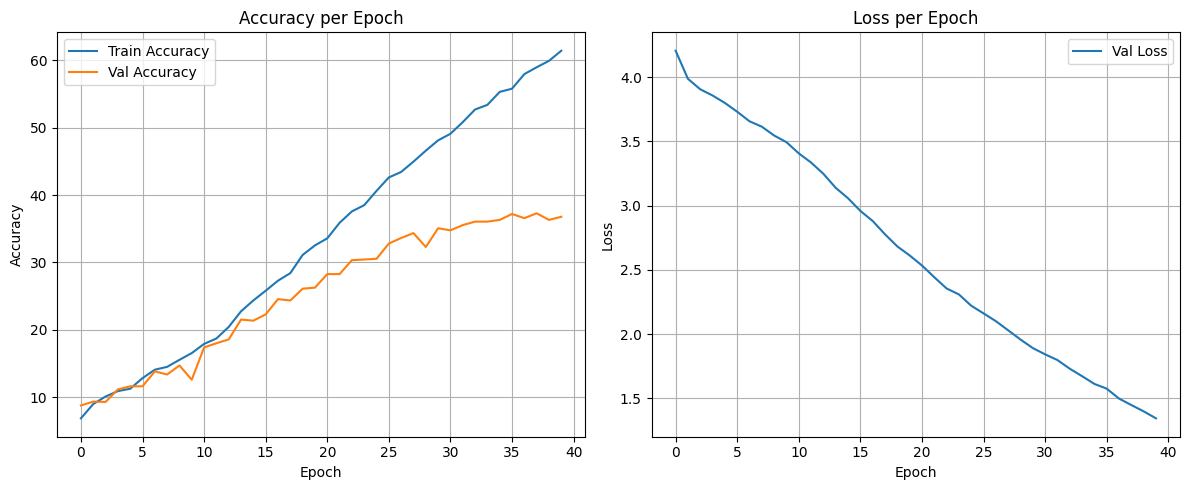

In [ ]:
import os
import random
import numpy as np
import shutil
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []


# ====== 2. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ ======
image_size = 128

train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# ====== 3. –î–∞—Ç–∞—Å–µ—Ç—ã –∏ –ª–æ–∞–¥–µ—Ä—ã ======
train_dataset = datasets.ImageFolder("data_split/train", transform=train_transforms)
val_dataset = datasets.ImageFolder("data_split/val", transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

# ====== 4. –ú–æ–¥–µ–ª—å ======
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)
        return out

class SimpleResNet(nn.Module):
    def __init__(self, num_classes=100):
        super(SimpleResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(32, 64, stride=2)
        self.layer2 = self._make_layer(64, 128, stride=2)
        self.layer3 = self._make_layer(128, 256, stride=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_channels, out_channels, stride):
        layers = [
            ResidualBlock(in_channels, out_channels, stride),
            ResidualBlock(out_channels, out_channels, stride=1)
        ]
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)

        out = self.global_avg_pool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# ====== 5. –û–±—É—á–µ–Ω–∏–µ ======
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleResNet(num_classes=100).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

best_val_acc = 0
no_improve_epochs = 0
early_stop_patience = 5  # —Å–∫–æ–ª—å–∫–æ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏—è –∂–¥–∞—Ç—å

num_epochs = 40

for epoch in range(1, num_epochs+1):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}")

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100. * val_correct / val_total
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch}/{num_epochs}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print(f"LR: {optimizer.param_groups[0]['lr']}")

    train_accuracies.append(train_acc)
    val_losses.append(train_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        no_improve_epochs = 0  # –æ–±–Ω—É–ª–∏–ª–∏ —Å—á—ë—Ç—á–∏–∫
        torch.save(model.state_dict(), "model_no_tl_aug.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
    else:
        no_improve_epochs += 1
        print(f"–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ {no_improve_epochs} —ç–ø–æ—Ö")

        if no_improve_epochs >= early_stop_patience:
            print("–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
            break

# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –≤–∞—Ä–∏–∞–Ω—Ç—É —Å–æ —Å–ª–æ–∂–Ω—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏ –∏ train acc, –∏ val acc –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç —Ä–∞—Å—Ç–∏ —Å–ø—É—Å—Ç—è 40 —ç–ø–æ—Ö

–ü—Ä–∏ —ç—Ç–æ–º –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–µ, –∏ –ø–æ val acc –ø–æ—Ö–æ–∂–µ, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç –¥–æ—Å—Ç–∏–≥–∞—Ç—å "–ø–æ—Ç–æ–ª–æ–∫"

–í—ã–≤–æ–¥ - –¥–ª—è —Ç–∞–∫–æ–π –º–æ–¥–µ–ª–∏ —Å–ª–æ–∂–Ω—ã–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã

### –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.75it/s]


–≠–ø–æ—Ö–∞ 1/40, Loss: 4.2070, Train Acc: 6.71%, Val Acc: 9.34%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.89it/s]


–≠–ø–æ—Ö–∞ 2/40, Loss: 3.9768, Train Acc: 9.19%, Val Acc: 9.80%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 3/40, Loss: 3.8623, Train Acc: 10.29%, Val Acc: 11.35%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 4/40, Loss: 3.7893, Train Acc: 11.69%, Val Acc: 11.15%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 5/40, Loss: 3.7178, Train Acc: 12.89%, Val Acc: 13.00%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 6/40, Loss: 3.6543, Train Acc: 13.88%, Val Acc: 12.85%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.96it/s]


–≠–ø–æ—Ö–∞ 7/40, Loss: 3.5870, Train Acc: 14.40%, Val Acc: 13.73%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.78it/s]


–≠–ø–æ—Ö–∞ 8/40, Loss: 3.5001, Train Acc: 15.54%, Val Acc: 15.22%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 9/40, Loss: 3.4312, Train Acc: 17.22%, Val Acc: 15.89%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 10/40, Loss: 3.3540, Train Acc: 18.73%, Val Acc: 16.77%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.96it/s]


–≠–ø–æ—Ö–∞ 11/40, Loss: 3.2642, Train Acc: 20.29%, Val Acc: 17.49%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.88it/s]


–≠–ø–æ—Ö–∞ 12/40, Loss: 3.1443, Train Acc: 22.39%, Val Acc: 20.59%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.87it/s]


–≠–ø–æ—Ö–∞ 13/40, Loss: 3.0610, Train Acc: 23.93%, Val Acc: 22.50%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 14/40, Loss: 2.9540, Train Acc: 25.86%, Val Acc: 20.43%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 15/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.96it/s]


–≠–ø–æ—Ö–∞ 15/40, Loss: 2.8682, Train Acc: 27.79%, Val Acc: 25.18%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 16/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 16/40, Loss: 2.7727, Train Acc: 28.96%, Val Acc: 25.03%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 17/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 17/40, Loss: 2.6885, Train Acc: 31.27%, Val Acc: 26.47%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 18/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 18/40, Loss: 2.5925, Train Acc: 32.95%, Val Acc: 28.43%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 19/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 19/40, Loss: 2.5317, Train Acc: 34.05%, Val Acc: 26.47%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 20/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.89it/s]


–≠–ø–æ—Ö–∞ 20/40, Loss: 2.4393, Train Acc: 36.12%, Val Acc: 30.24%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 21/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.88it/s]


–≠–ø–æ—Ö–∞ 21/40, Loss: 2.3576, Train Acc: 37.72%, Val Acc: 31.79%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 22/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 22/40, Loss: 2.2740, Train Acc: 40.20%, Val Acc: 32.15%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 23/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 23/40, Loss: 2.2151, Train Acc: 40.95%, Val Acc: 32.51%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 24/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.89it/s]


–≠–ø–æ—Ö–∞ 24/40, Loss: 2.1598, Train Acc: 42.12%, Val Acc: 33.49%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 25/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 25/40, Loss: 2.0721, Train Acc: 44.28%, Val Acc: 33.64%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 26/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.92it/s]


–≠–ø–æ—Ö–∞ 26/40, Loss: 2.0078, Train Acc: 45.02%, Val Acc: 34.62%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 27/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.93it/s]


–≠–ø–æ—Ö–∞ 27/40, Loss: 1.9738, Train Acc: 46.12%, Val Acc: 34.47%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 28/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 28/40, Loss: 1.8962, Train Acc: 48.07%, Val Acc: 35.14%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 29/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.89it/s]


–≠–ø–æ—Ö–∞ 29/40, Loss: 1.8273, Train Acc: 49.34%, Val Acc: 34.47%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 30/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.88it/s]


–≠–ø–æ—Ö–∞ 30/40, Loss: 1.7784, Train Acc: 50.57%, Val Acc: 37.41%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 31/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 31/40, Loss: 1.7057, Train Acc: 52.67%, Val Acc: 33.90%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 32/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.90it/s]


–≠–ø–æ—Ö–∞ 32/40, Loss: 1.6501, Train Acc: 54.13%, Val Acc: 35.24%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 33/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 33/40, Loss: 1.6071, Train Acc: 54.70%, Val Acc: 35.91%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 3 —ç–ø–æ—Ö


Epoch 34/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 34/40, Loss: 1.5383, Train Acc: 56.70%, Val Acc: 38.96%
LR: 0.001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 35/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.94it/s]


–≠–ø–æ—Ö–∞ 35/40, Loss: 1.4947, Train Acc: 57.55%, Val Acc: 36.79%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 1 —ç–ø–æ—Ö


Epoch 36/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.88it/s]


–≠–ø–æ—Ö–∞ 36/40, Loss: 1.4354, Train Acc: 59.31%, Val Acc: 38.70%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 2 —ç–ø–æ—Ö


Epoch 37/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.89it/s]


–≠–ø–æ—Ö–∞ 37/40, Loss: 1.3902, Train Acc: 60.94%, Val Acc: 37.67%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 3 —ç–ø–æ—Ö


Epoch 38/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:20<00:00,  5.91it/s]


–≠–ø–æ—Ö–∞ 38/40, Loss: 1.3540, Train Acc: 60.83%, Val Acc: 37.77%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 4 —ç–ø–æ—Ö


Epoch 39/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:19<00:00,  5.95it/s]


–≠–ø–æ—Ö–∞ 39/40, Loss: 1.2833, Train Acc: 63.10%, Val Acc: 38.13%
LR: 0.001
–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ 5 —ç–ø–æ—Ö
–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞


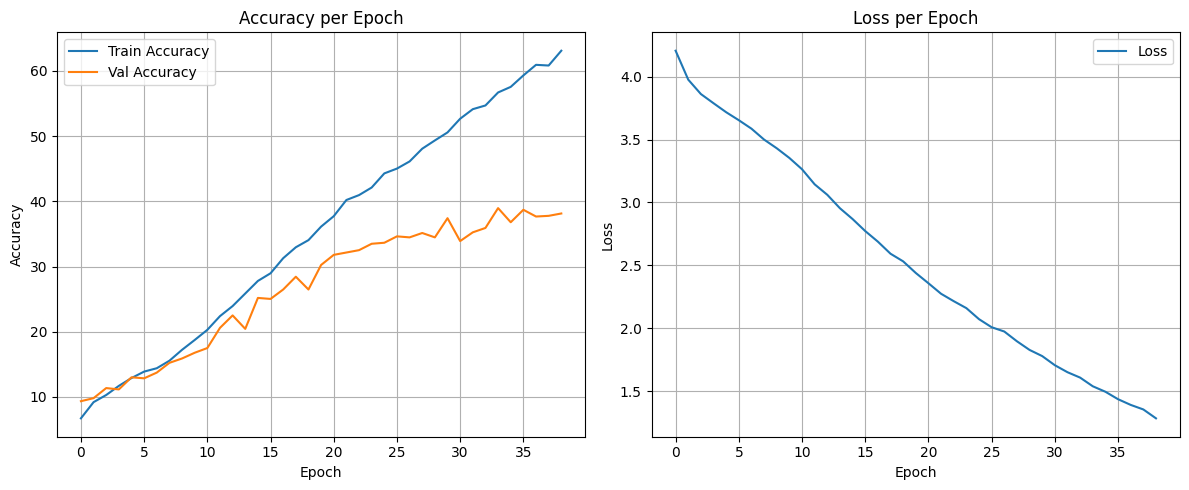

In [ ]:
import os
import random
import numpy as np
import shutil
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ (—Ç–µ–ø–µ—Ä—å ‚Äî —Ç–æ–ª—å–∫–æ –±–∞–∑–æ–≤—ã–µ, –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π)
IMG_SIZE = 128
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# ====== 3. –î–∞—Ç–∞—Å–µ—Ç—ã –∏ –ª–æ–∞–¥–µ—Ä—ã ======
train_dataset = datasets.ImageFolder("data_split/train", transform=train_transforms)
val_dataset = datasets.ImageFolder("data_split/val", transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

# ====== 4. –ú–æ–¥–µ–ª—å ======
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)
        return out

class SimpleResNet(nn.Module):
    def __init__(self, num_classes=100):
        super(SimpleResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(32, 64, stride=2)
        self.layer2 = self._make_layer(64, 128, stride=2)
        self.layer3 = self._make_layer(128, 256, stride=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_channels, out_channels, stride):
        layers = [
            ResidualBlock(in_channels, out_channels, stride),
            ResidualBlock(out_channels, out_channels, stride=1)
        ]
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)

        out = self.global_avg_pool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# ====== 5. –û–±—É—á–µ–Ω–∏–µ ======
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleResNet(num_classes=100).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

best_val_acc = 0

num_epochs = 40

for epoch in range(1, num_epochs+1):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}")

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100. * val_correct / val_total
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch}/{num_epochs}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print(f"LR: {optimizer.param_groups[0]['lr']}")

    train_accuracies.append(train_acc)
    val_losses.append(train_loss)
    val_accuracies.append(val_acc)


    if val_acc > best_val_acc:
        best_val_acc = val_acc
        no_improve_epochs = 0  # –æ–±–Ω—É–ª–∏–ª–∏ —Å—á—ë—Ç—á–∏–∫
        torch.save(model.state_dict(), "best_model_no_tl_no_aug.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
    else:
        no_improve_epochs += 1
        print(f"–ù–µ—Ç —É–ª—É—á—à–µ–Ω–∏—è —É–∂–µ {no_improve_epochs} —ç–ø–æ—Ö")

        if no_improve_epochs >= early_stop_patience:
            print("–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
            break


# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏ –Ω–∞ —Ç–µ, —á—Ç–æ –±—ã–ª–∏ —É –º–æ–¥–µ–ª–∏ —Å –ø—Ä–æ—Å—Ç—ã–º–∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏, –Ω–æ —Ç—É—Ç –æ–±—É—á–µ–Ω–∏–µ –µ—â–µ –∏ –ø—Ä–æ—Ö–æ–¥–∏—Ç –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª–µ–µ –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ.

–¢–∞–∫–∂–µ —ç—Ç–æ—Ç –≤–∞—Ä–∏–∞–Ω—Ç –º–æ–¥–µ–ª–∏ –ø–æ–∫–∞–∑–∞–ª —Å–∞–º—ã–µ –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è val accuracy –∏–∑ –≤—Å–µ—Ö —Ç—Ä–µ—Ö

–î–ª—è –º–æ–µ–π –Ω–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –æ—á–µ–Ω—å –≤–∞–∂–Ω—ã —Å–ª–æ–∂–Ω—ã–µ —Ö–æ—Ä–æ—à–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏, –±–µ–∑ –Ω–∏—Ö –æ–Ω–∞ –ø—Ä—è–º –ø–ª–æ—Ö–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è

# –ë–ª–æ–∫ 4. –û–±—É—á–µ–Ω–∏–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –±—É–¥–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –∏ –∞–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏

## –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä (GAN)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

IMG_SIZE = 128
NUM_CLASSES = 100
Z_DIM = 100

In [15]:
import os
from sklearn.model_selection import StratifiedShuffleSplit

def get_stratified_datasets(root_dir, test_size=0.2):
    all_samples = []
    all_labels = []
    class_names = sorted(os.listdir(root_dir))
    for class_id in class_names:
        class_path = os.path.join(root_dir, class_id)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                all_samples.append((fpath, int(class_id)))
                all_labels.append(int(class_id))

    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    train_idx, val_idx = next(splitter.split(all_samples, all_labels))
    train_samples = [all_samples[i] for i in train_idx]
    val_samples = [all_samples[i] for i in val_idx]
    return train_samples, val_samples, class_names


In [16]:
train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")


In [8]:
class Generator(nn.Module):
    def __init__(self, z_dim, num_classes, img_size):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(z_dim + num_classes, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, 3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        gen_input = torch.cat((noise, self.label_emb(labels)), -1)
        out = self.l1(gen_input)
        out = out.view(out.size(0), 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

In [9]:
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_size):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.model = nn.Sequential(
            nn.Conv2d(3 + 1, 64, 3, stride=2, padding=1),  # 3 channels + 1 for label
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ZeroPad2d((0,1,0,1)),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.BatchNorm2d(256, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(256, 512, 3, stride=2, padding=1),
            nn.BatchNorm2d(512, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
        )

        ds_size = img_size // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(512 * ds_size ** 2, 1), nn.Sigmoid())

    def forward(self, img, labels):
        # Expand label embeddings to match image size
        label_embeddings = self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        label_embeddings = label_embeddings.expand(-1, -1, img.size(2), img.size(3))
        d_in = torch.cat((img, label_embeddings), 1)
        out = self.model(d_in)
        out = out.view(out.size(0), -1)
        validity = self.adv_layer(out)
        return validity


In [18]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from tqdm import tqdm
import numpy as np
import random

# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# –†–∞–∑–º–µ—Ä—ã
IMG_SIZE = 128
NUM_CLASSES = 100
Z_DIM = 100
BATCH_SIZE = 64
GAN_EPOCHS = 20

# ---- Dataset (–∏—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–π —Ä–∞–Ω–µ–µ –∫–ª–∞—Å—Å) ----
class CustomImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# ---- –ü—Ä–æ—Å—Ç–æ–π —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º –¥–ª—è GAN ----
gan_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# ---- –ó–∞–≥—Ä—É–∂–∞–µ–º train_samples (–∏–∑ —Ç–≤–æ–µ–≥–æ –∫–æ–¥–∞) ----
# –ï—Å–ª–∏ –Ω—É–∂–Ω–æ, –ø–æ–≤—Ç–æ—Ä–∏ –∏–ª–∏ –∑–∞–≥—Ä—É–∑–∏ —Å–Ω–æ–≤–∞:
# train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")

gan_dataset = CustomImageDataset(train_samples, transform=gan_transform)
train_loader = DataLoader(gan_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---- –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä ----
class Generator(nn.Module):
    def __init__(self, z_dim, num_classes, img_size):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(z_dim + num_classes, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, 3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        gen_input = torch.cat((noise, self.label_emb(labels)), -1)
        out = self.l1(gen_input)
        out = out.view(out.size(0), 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

# ---- –î–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä ----
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_size):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, 1)
        self.img_size = img_size

        self.model = nn.Sequential(
            nn.Conv2d(4, 64, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.BatchNorm2d(256, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(256, 512, 3, stride=2, padding=1),
            nn.BatchNorm2d(512, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
        )

        ds_size = img_size // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(512 * ds_size * ds_size, 1), nn.Sigmoid())

    def forward(self, img, labels):
        label_map = self.label_emb(labels).view(-1, 1, 1, 1).expand(-1, 1, self.img_size, self.img_size)
        d_in = torch.cat((img, label_map), 1)
        out = self.model(d_in)
        out = out.view(out.size(0), -1)
        validity = self.adv_layer(out)
        return validity

# ---- –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è ----
generator = Generator(Z_DIM, NUM_CLASSES, IMG_SIZE).to(device)
discriminator = Discriminator(NUM_CLASSES, IMG_SIZE).to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

adversarial_loss = nn.BCELoss()

# ---- –û–±—É—á–µ–Ω–∏–µ GAN ----
for epoch in range(GAN_EPOCHS):
    generator.train()
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        batch_size = imgs.size(0)

        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # ====== –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä ======
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, Z_DIM, device=device)
        gen_labels = torch.randint(0, NUM_CLASSES, (batch_size,), device=device)
        gen_imgs = generator(z, gen_labels)
        g_loss = adversarial_loss(discriminator(gen_imgs, gen_labels), valid)
        g_loss.backward()
        optimizer_G.step()

        # ====== –î–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä ======
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(imgs, labels), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # –ü—Ä–æ–≥—Ä–µ—Å—Å
        if i % 100 == 0:
            print(f"[Epoch {epoch+1}/{GAN_EPOCHS}] [Batch {i}/{len(train_loader)}] D_loss: {d_loss.item():.4f} G_loss: {g_loss.item():.4f}")

# ---- –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ –∫–ª–∞—Å—Å–∞–º ----
os.makedirs("generated_images", exist_ok=True)
generator.eval()

for class_label in range(NUM_CLASSES):
    z = torch.randn(10, Z_DIM, device=device)
    labels = torch.full((10,), class_label, dtype=torch.long, device=device)
    with torch.no_grad():
        gen_imgs = generator(z, labels)
    for i, img in enumerate(gen_imgs):
        save_image(img, f"generated_images/class_{class_label}_{i}.png", normalize=True)


[Epoch 1/20] [Batch 0/95] D_loss: 0.6931 G_loss: 0.6946
[Epoch 2/20] [Batch 0/95] D_loss: 0.2108 G_loss: 2.2288
[Epoch 3/20] [Batch 0/95] D_loss: 0.2799 G_loss: 7.8329
[Epoch 4/20] [Batch 0/95] D_loss: 0.0782 G_loss: 3.9785
[Epoch 5/20] [Batch 0/95] D_loss: 3.5198 G_loss: 0.0284
[Epoch 6/20] [Batch 0/95] D_loss: 0.0100 G_loss: 4.1446
[Epoch 7/20] [Batch 0/95] D_loss: 0.0259 G_loss: 4.0138
[Epoch 8/20] [Batch 0/95] D_loss: 0.0083 G_loss: 6.4488
[Epoch 9/20] [Batch 0/95] D_loss: 0.0020 G_loss: 6.3085
[Epoch 10/20] [Batch 0/95] D_loss: 0.0053 G_loss: 6.4960
[Epoch 11/20] [Batch 0/95] D_loss: 0.0007 G_loss: 8.4066
[Epoch 12/20] [Batch 0/95] D_loss: 0.0069 G_loss: 7.1347
[Epoch 13/20] [Batch 0/95] D_loss: 0.0004 G_loss: 8.9197
[Epoch 14/20] [Batch 0/95] D_loss: 0.0002 G_loss: 9.0087
[Epoch 15/20] [Batch 0/95] D_loss: 0.0016 G_loss: 8.5632
[Epoch 16/20] [Batch 0/95] D_loss: 0.0004 G_loss: 6.8730
[Epoch 17/20] [Batch 0/95] D_loss: 0.0004 G_loss: 9.3732
[Epoch 18/20] [Batch 0/95] D_loss: 0.000

In [21]:
LATENT_DIM = 100  # –†–∞–∑–º–µ—Ä –≤–µ–∫—Ç–æ—Ä–∞ —à—É–º–∞ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞
class GANAugmentedDataset(Dataset):
    def __init__(self, real_samples, generator, transform, p_fake=0.3, latent_dim=100, num_classes=100):
        self.real_samples = real_samples
        self.generator = generator
        self.transform = transform
        self.p_fake = p_fake
        self.latent_dim = latent_dim
        self.num_classes = num_classes

    def __len__(self):
        return len(self.real_samples)

    def __getitem__(self, idx):
        if random.random() < self.p_fake:
            # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Ñ–µ–π–∫–æ–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
            label = random.randint(0, self.num_classes - 1)
            z = torch.randn(1, self.latent_dim).to(device)
            label_tensor = torch.tensor([label], dtype=torch.long).to(device)
            with torch.no_grad():
                gen_img = self.generator(z, label_tensor).squeeze(0).cpu()
            return gen_img, label
        else:
            # –ó–∞–≥—Ä—É–∂–∞–µ–º —Ä–µ–∞–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
            img_path, label = self.real_samples[idx]
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if self.transform:
                image = self.transform(image=image)['image']
            return image, label


In [22]:
augmented_dataset = GANAugmentedDataset(train_samples, generator, train_transform, p_fake=0.3, latent_dim=LATENT_DIM, num_classes=len(class_names))
augmented_loader = DataLoader(augmented_dataset, batch_size=32, shuffle=True)


—Ç–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –≤—ã–±—Ä–∞–Ω–Ω—É—é –ª—É—á—à—É—é –º–æ–¥–µ–ª—å —Å–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ (p_fake=0.3 => –∏—Ö 30%)

<ipython-input-24-7cfa183988b9>:31: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [01:03<00:00,  3.01it/s]


–≠–ø–æ—Ö–∞ 1/40, Loss: 4.2023, Train Acc: 9.05%, Val Acc: 43.83%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 2/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:59<00:00,  3.18it/s]


–≠–ø–æ—Ö–∞ 2/40, Loss: 2.9628, Train Acc: 27.41%, Val Acc: 62.64%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 3/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:55<00:00,  3.40it/s]


–≠–ø–æ—Ö–∞ 3/40, Loss: 2.4935, Train Acc: 33.83%, Val Acc: 68.38%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 4/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:54<00:00,  3.48it/s]


–≠–ø–æ—Ö–∞ 4/40, Loss: 2.3768, Train Acc: 37.68%, Val Acc: 71.68%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 5/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:55<00:00,  3.45it/s]


–≠–ø–æ—Ö–∞ 5/40, Loss: 2.3260, Train Acc: 45.27%, Val Acc: 74.32%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 6/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:56<00:00,  3.39it/s]


–≠–ø–æ—Ö–∞ 6/40, Loss: 2.1646, Train Acc: 40.10%, Val Acc: 74.32%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 7/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:55<00:00,  3.44it/s]


–≠–ø–æ—Ö–∞ 7/40, Loss: 2.2046, Train Acc: 42.99%, Val Acc: 76.90%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 8/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.31it/s]


–≠–ø–æ—Ö–∞ 8/40, Loss: 2.1784, Train Acc: 47.05%, Val Acc: 76.90%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 9/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [01:00<00:00,  3.13it/s]


–≠–ø–æ—Ö–∞ 9/40, Loss: 2.1931, Train Acc: 37.46%, Val Acc: 77.49%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 10/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:59<00:00,  3.18it/s]


–≠–ø–æ—Ö–∞ 10/40, Loss: 2.0126, Train Acc: 42.55%, Val Acc: 77.82%
LR: 0.0001
–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å


Epoch 11/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:57<00:00,  3.28it/s]


–≠–ø–æ—Ö–∞ 11/40, Loss: 2.0206, Train Acc: 41.74%, Val Acc: 76.30%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 1 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 12/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:54<00:00,  3.46it/s]


–≠–ø–æ—Ö–∞ 12/40, Loss: 2.0209, Train Acc: 43.57%, Val Acc: 76.44%
LR: 0.0001
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 2 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 13/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:55<00:00,  3.45it/s]


–≠–ø–æ—Ö–∞ 13/40, Loss: 2.0113, Train Acc: 44.77%, Val Acc: 76.24%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 3 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥


Epoch 14/40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 190/190 [00:55<00:00,  3.45it/s]


–≠–ø–æ—Ö–∞ 14/40, Loss: 1.9477, Train Acc: 45.44%, Val Acc: 77.23%
LR: 5e-05
–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è 4 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥
–°—Ä–∞–±–æ—Ç–∞–ª–∞ —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞

 –õ—É—á—à–∞—è validation accuracy: 77.82%


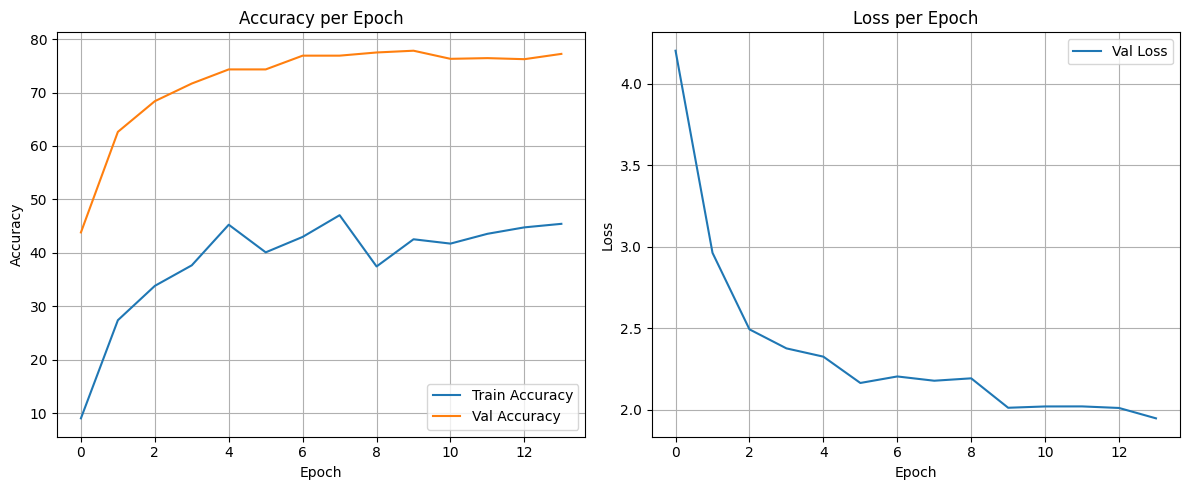

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import cv2
import os
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from tqdm import tqdm

# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
IMG_SIZE = 128
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.3),
    A.HueSaturationValue(p=0.2),
    A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE, p=0.1),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.2),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.2),
    A.MotionBlur(p=0.2),
    A.ElasticTransform(p=0.1),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# Dataset
class CustomImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
def get_stratified_datasets(root_dir, test_size=0.2):
    all_samples = []
    all_labels = []
    class_names = sorted(os.listdir(root_dir))
    for class_id in class_names:
        class_path = os.path.join(root_dir, class_id)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                all_samples.append((fpath, int(class_id)))
                all_labels.append(int(class_id))

    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    train_idx, val_idx = next(splitter.split(all_samples, all_labels))
    train_samples = [all_samples[i] for i in train_idx]
    val_samples = [all_samples[i] for i in val_idx]
    return train_samples, val_samples, class_names

train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")

train_dataset = CustomImageDataset(train_samples, transform=train_transform)
val_dataset = CustomImageDataset(val_samples, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Class Weights
def get_class_weights(samples, num_classes):
    label_counts = Counter([label for _, label in samples])
    class_weights = [0] * num_classes
    total = sum(label_counts.values())
    for i in range(num_classes):
        class_weights[i] = total / (num_classes * label_counts[i])
    return torch.tensor(class_weights, dtype=torch.float)

class_weights = get_class_weights(train_samples, len(class_names)).to(device)

# –ú–æ–¥–µ–ª—å wide_resnet50_2
model = timm.create_model('wide_resnet50_2', pretrained=True, num_classes=len(class_names))
model = model.to(device)

# –†–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å—ë
for param in model.parameters():
    param.requires_grad = True

# Loss
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, weight=class_weights)

# Mixup
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∏ LR Scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞
best_val_acc = 0
early_stop_patience = 4
no_improve_epochs = 0
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(augmented_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    epoch_loss = running_loss / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è + TTA
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            tta_outputs = []
            for tta in [lambda x: x, lambda x: torch.flip(x, dims=[3]), lambda x: torch.flip(x, dims=[2])]:
                tta_inputs = tta(inputs)
                tta_outputs.append(model(tta_inputs))
            outputs = sum(tta_outputs) / len(tta_outputs)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    print(f"–≠–ø–æ—Ö–∞ {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print("LR:", optimizer.param_groups[0]['lr'])

    train_accuracies.append(train_acc)
    val_losses.append(epoch_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "generated_best_model_wide_resnet50_2.pth")
        print("–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å")
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        print(f"–ù–µ –±—ã–ª–æ —É–ª—É—á—à–µ–Ω–∏—è {no_improve_epochs} —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥")

    if no_improve_epochs >= early_stop_patience:
        print("–°—Ä–∞–±–æ—Ç–∞–ª–∞ —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞")
        break

print(f"\n –õ—É—á—à–∞—è validation accuracy: {best_val_acc:.2f}%")



# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–†–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ–º–Ω–æ–≥–æ —Ö—É–∂–µ, —á–µ–º –±–µ–∑ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞. –ó–Ω–∞—á–∏—Ç, –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –Ω–µ–¥–æ–æ–±—É—á–µ–Ω –∏–ª–∏ –æ–Ω —Å–ª–∏—à–∫–æ–º –ø—Ä–æ—Å—Ç–æ–π

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å (–¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ –∫–∞–≥–ª)

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –ø—Ä–∏–≤–µ–¥–µ–Ω –∫–æ–¥ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±—è –ª—É—á—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, –∞ —Ç–∞–∫–∂–µ –±–ª–æ–∫ –∫–æ–¥–∞ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ —Ñ–∞–π–ª–∞ –Ω–∞ –∫–∞–≥–ª

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import cv2
import os
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from tqdm import tqdm

# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
IMG_SIZE = 128
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.3),
    A.HueSaturationValue(p=0.2),
    A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE, p=0.1),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.2),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.2),
    A.MotionBlur(p=0.2),
    A.ElasticTransform(p=0.1),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
    A.Normalize(),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# Dataset
class CustomImageDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
def get_stratified_datasets(root_dir, test_size=0.2):
    all_samples = []
    all_labels = []
    class_names = sorted(os.listdir(root_dir))
    for class_id in class_names:
        class_path = os.path.join(root_dir, class_id)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                all_samples.append((fpath, int(class_id)))
                all_labels.append(int(class_id))

    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    train_idx, val_idx = next(splitter.split(all_samples, all_labels))
    train_samples = [all_samples[i] for i in train_idx]
    val_samples = [all_samples[i] for i in val_idx]
    return train_samples, val_samples, class_names

train_samples, val_samples, class_names = get_stratified_datasets("data_split/train")

train_dataset = CustomImageDataset(train_samples, transform=train_transform)
val_dataset = CustomImageDataset(val_samples, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Class Weights
def get_class_weights(samples, num_classes):
    label_counts = Counter([label for _, label in samples])
    class_weights = [0] * num_classes
    total = sum(label_counts.values())
    for i in range(num_classes):
        class_weights[i] = total / (num_classes * label_counts[i])
    return torch.tensor(class_weights, dtype=torch.float)

class_weights = get_class_weights(train_samples, len(class_names)).to(device)

# –ú–æ–¥–µ–ª—å wide_resnet50_2
model = timm.create_model('wide_resnet50_2', pretrained=True, num_classes=len(class_names))
model = model.to(device)

# –†–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å—ë
for param in model.parameters():
    param.requires_grad = True

# Loss
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, weight=class_weights)

# Mixup
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∏ LR Scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞
best_val_acc = 0
early_stop_patience = 4
no_improve_epochs = 0
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    epoch_loss = running_loss / total

    # –í–∞–ª–∏–¥–∞—Ü–∏—è + TTA
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            tta_outputs = []
            for tta in [lambda x: x, lambda x: torch.flip(x, dims=[3]), lambda x: torch.flip(x, dims=[2])]:
                tta_inputs = tta(inputs)
                tta_outputs.append(model(tta_inputs))
            outputs = sum(tta_outputs) / len(tta_outputs)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
    print("Current LR:", optimizer.param_groups[0]['lr'])

    train_accuracies.append(train_acc)
    val_losses.append(epoch_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_wide_resnet50_2.pth")
        print("‚úÖ Model saved!")
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        print(f"‚ùå No improvement for {no_improve_epochs} epoch(s)")

    if no_improve_epochs >= early_stop_patience:
        print("üõë Early stopping triggered.")
        break

print(f"\nüìà Best Validation Accuracy: {best_val_acc:.2f}%")



# –ì—Ä–∞—Ñ–∏–∫–∏ loss –∏ accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)

plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

–±–ª–æ–∫ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ –∫–∞–≥–ª:

In [9]:
import pandas as pd
import torch
import os
import cv2
import numpy as np
import timm
from tqdm import tqdm
from albumentations.pytorch import ToTensorV2
import albumentations as A


device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")


# –ü—É—Ç–∏
test_dir = "data/data/test"
sample_path = "data/sample_submission.csv"

# –†–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
IMG_SIZE = 128

# –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(),
    ToTensorV2()
])

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏
model = timm.create_model('wide_resnet50_2', pretrained=True, num_classes=len(class_names))
model.load_state_dict(torch.load("best_model_wide_resnet50_2.pth", map_location=device))
model.to(device)
model.eval()

# –ó–∞–≥—Ä—É–∑–∫–∞ sample_submission
submission = pd.read_csv(sample_path)

# –°–æ—Ä—Ç–∏—Ä—É–µ–º —Ñ–∞–π–ª—ã –ø–æ —á–∏—Å–ª–æ–≤–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –∏–º–µ–Ω–∏ —Ñ–∞–π–ª–∞
image_ids = sorted(os.listdir(test_dir), key=lambda x: int(os.path.splitext(x)[0]))

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
preds = []
for img_name in tqdm(image_ids, desc="Predicting"):
    img_path = os.path.join(test_dir, img_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = val_transform(image=image)['image'].unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        pred = torch.argmax(output, dim=1).item()
        preds.append(pred)

# –û–±–Ω–æ–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É Target
submission['target'] = preds

# –°–æ—Ö—Ä–∞–Ω—è–µ–º
submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv –≥–æ—Ç–æ–≤–∞ –∫ –∑–∞–≥—Ä—É–∑–∫–µ –Ω–∞ Kaggle!")


Predicting: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3878/3878 [00:38<00:00, 100.61it/s]

‚úÖ submission.csv –≥–æ—Ç–æ–≤–∞ –∫ –∑–∞–≥—Ä—É–∑–∫–µ –Ω–∞ Kaggle!
